In [1]:
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
datasets 2.1.0 requires tqdm>=4.62.1, but you have tqdm 4.62.0 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from scipy.signal import periodogram

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(20, 7),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10,
)
plt.rc(
    'xtick',
    alignment='center',
    labeltop=True,
    )
plt.rc(
    'ytick',
    labelright=True,
)
%config InlineBackend.figure_format = 'retina'

steps = 48

/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2006.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2011.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2001.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2019.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2020.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2010.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2008.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2012.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2015.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2021.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2018.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2007.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2016.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2003.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2014.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2013.csv
/kaggle/input/temperatura-w-polsce-20012022/k_m_t_2002.c

In [3]:
df1 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2001.csv')
df2 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2002.csv') 
df3 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2003.csv') 
df4 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2004.csv') 
df5 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2005.csv') 
df6 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2006.csv') 
df7 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2007.csv') 
df8 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2008.csv') 
df9 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2009.csv') 
df10 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2010.csv')
df11 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2011.csv') 
df12 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2012.csv') 
df13 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2013.csv') 
df14 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2014.csv') 
df15 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2015.csv') 
df16 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2016.csv') 
df17 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2017.csv') 
df18 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2018.csv') 
df19 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2019.csv') 
df20 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2020.csv') 
df21 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2021.csv') 
df22 = pd.read_csv('../input/temperatura-w-polsce-20012022/k_m_t_2022.csv')
df23 = pd.read_csv('../input/temperaturawpolsce19912000/k_m_t_1991_1995.csv')
df24 = pd.read_csv('../input/temperaturawpolsce19912000/k_m_t_1996_2000.csv')

In [4]:
df1.head()

Kod stacji Nazwa stacji   Rok  Miesiąc  \
0   249180010     PSZCZYNA  2001        1   
1   249180010     PSZCZYNA  2001        2   
2   249180010     PSZCZYNA  2001        3   
3   249180010     PSZCZYNA  2001        4   
4   249180010     PSZCZYNA  2001        5   

   Średnia miesięczna temperatura [°C]  Status pomiaru TEMP  \
0                                 -1.5                  NaN   
1                                  0.0                  NaN   
2                                  3.3                  NaN   
3                                  7.5                  NaN   
4                                 14.6                  NaN   

   Średnia miesięczna wilgotność względna [%]  Status pomiaru WLGS  \
0                                         0.0                  8.0   
1                                         0.0                  8.0   
2                                         0.0                  8.0   
3                                         0.0                  8.0   
4                                         0.0                  8.0   

   Średnia miesięczna prędkość wiatru [m/s]  Status pomiaru FWS  \
0                                       1.2                 NaN   
1                                       1.6                 NaN   
2                                       1.7                 NaN   
3                                       1.3                 NaN   
4                                       1.4                 NaN   

   Średnie miesięczne zachmurzenie ogólne [oktanty]  Status pomiaru NOS  
0                                               5.9                 NaN  
1                                               4.6                 NaN  
2                                               5.6                 NaN  
3                                               5.7                 NaN  
4                                               3.9                 NaN

In [5]:
df = pd.concat([df23,df24,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22])
df = df[df['Nazwa stacji'].str.contains('WARSZAWA-BIELANY')]
df.rename(columns={'Średnia miesięczna temperatura [°C]': 'Monthly average temperature (°C)'}, inplace=True)
df.set_index(np.arange(1,len(df.index)+1), inplace=True)
df['Date'] = pd.period_range(start='1991-01-01', end='2022-06-30', freq='M')
df.index = df['Date']


In [6]:
df.tail()

Kod stacji      Nazwa stacji   Rok  Miesiąc  \
Date                                                   
2022-02   252200150  WARSZAWA-BIELANY  2022        2   
2022-03   252200150  WARSZAWA-BIELANY  2022        3   
2022-04   252200150  WARSZAWA-BIELANY  2022        4   
2022-05   252200150  WARSZAWA-BIELANY  2022        5   
2022-06   252200150  WARSZAWA-BIELANY  2022        6   

         Monthly average temperature (°C)  Status pomiaru TEMP  \
Date                                                             
2022-02                               3.5                  NaN   
2022-03                               3.7                  NaN   
2022-04                               7.6                  NaN   
2022-05                              14.4                  NaN   
2022-06                              20.1                  NaN   

         Średnia miesięczna wilgotność względna [%]  Status pomiaru WLGS  \
Date                                                                       
2022-02                                        81.2                  NaN   
2022-03                                        64.6                  NaN   
2022-04                                        70.1                  NaN   
2022-05                                        60.0                  NaN   
2022-06                                         0.0                  8.0   

         Średnia miesięczna prędkość wiatru [m/s]  Status pomiaru FWS  \
Date                                                                    
2022-02                                       3.6                 NaN   
2022-03                                       2.3                 NaN   
2022-04                                       2.5                 NaN   
2022-05                                       2.6                 NaN   
2022-06                                       2.2                 NaN   

         Średnie miesięczne zachmurzenie ogólne [oktanty]  Status pomiaru NOS  \
Date                                                                            
2022-02                                               0.0                 8.0   
2022-03                                               2.7                 NaN   
2022-04                                               5.5                 NaN   
2022-05                                               0.0                 8.0   
2022-06                                               0.0                 8.0   

            Date  
Date              
2022-02  2022-02  
2022-03  2022-03  
2022-04  2022-04  
2022-05  2022-05  
2022-06  2022-06

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 378 entries, 1991-01 to 2022-06
Freq: M
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype    
---  ------                                            --------------  -----    
 0   Kod stacji                                        378 non-null    int64    
 1   Nazwa stacji                                      378 non-null    object   
 2   Rok                                               378 non-null    int64    
 3   Miesiąc                                           378 non-null    int64    
 4   Monthly average temperature (°C)                  378 non-null    float64  
 5   Status pomiaru TEMP                               0 non-null      float64  
 6   Średnia miesięczna wilgotność względna [%]        378 non-null    float64  
 7   Status pomiaru WLGS                               3 non-null      float64  
 8   Średnia miesięczna prędkość wiatru [m/s]          378 non-nul

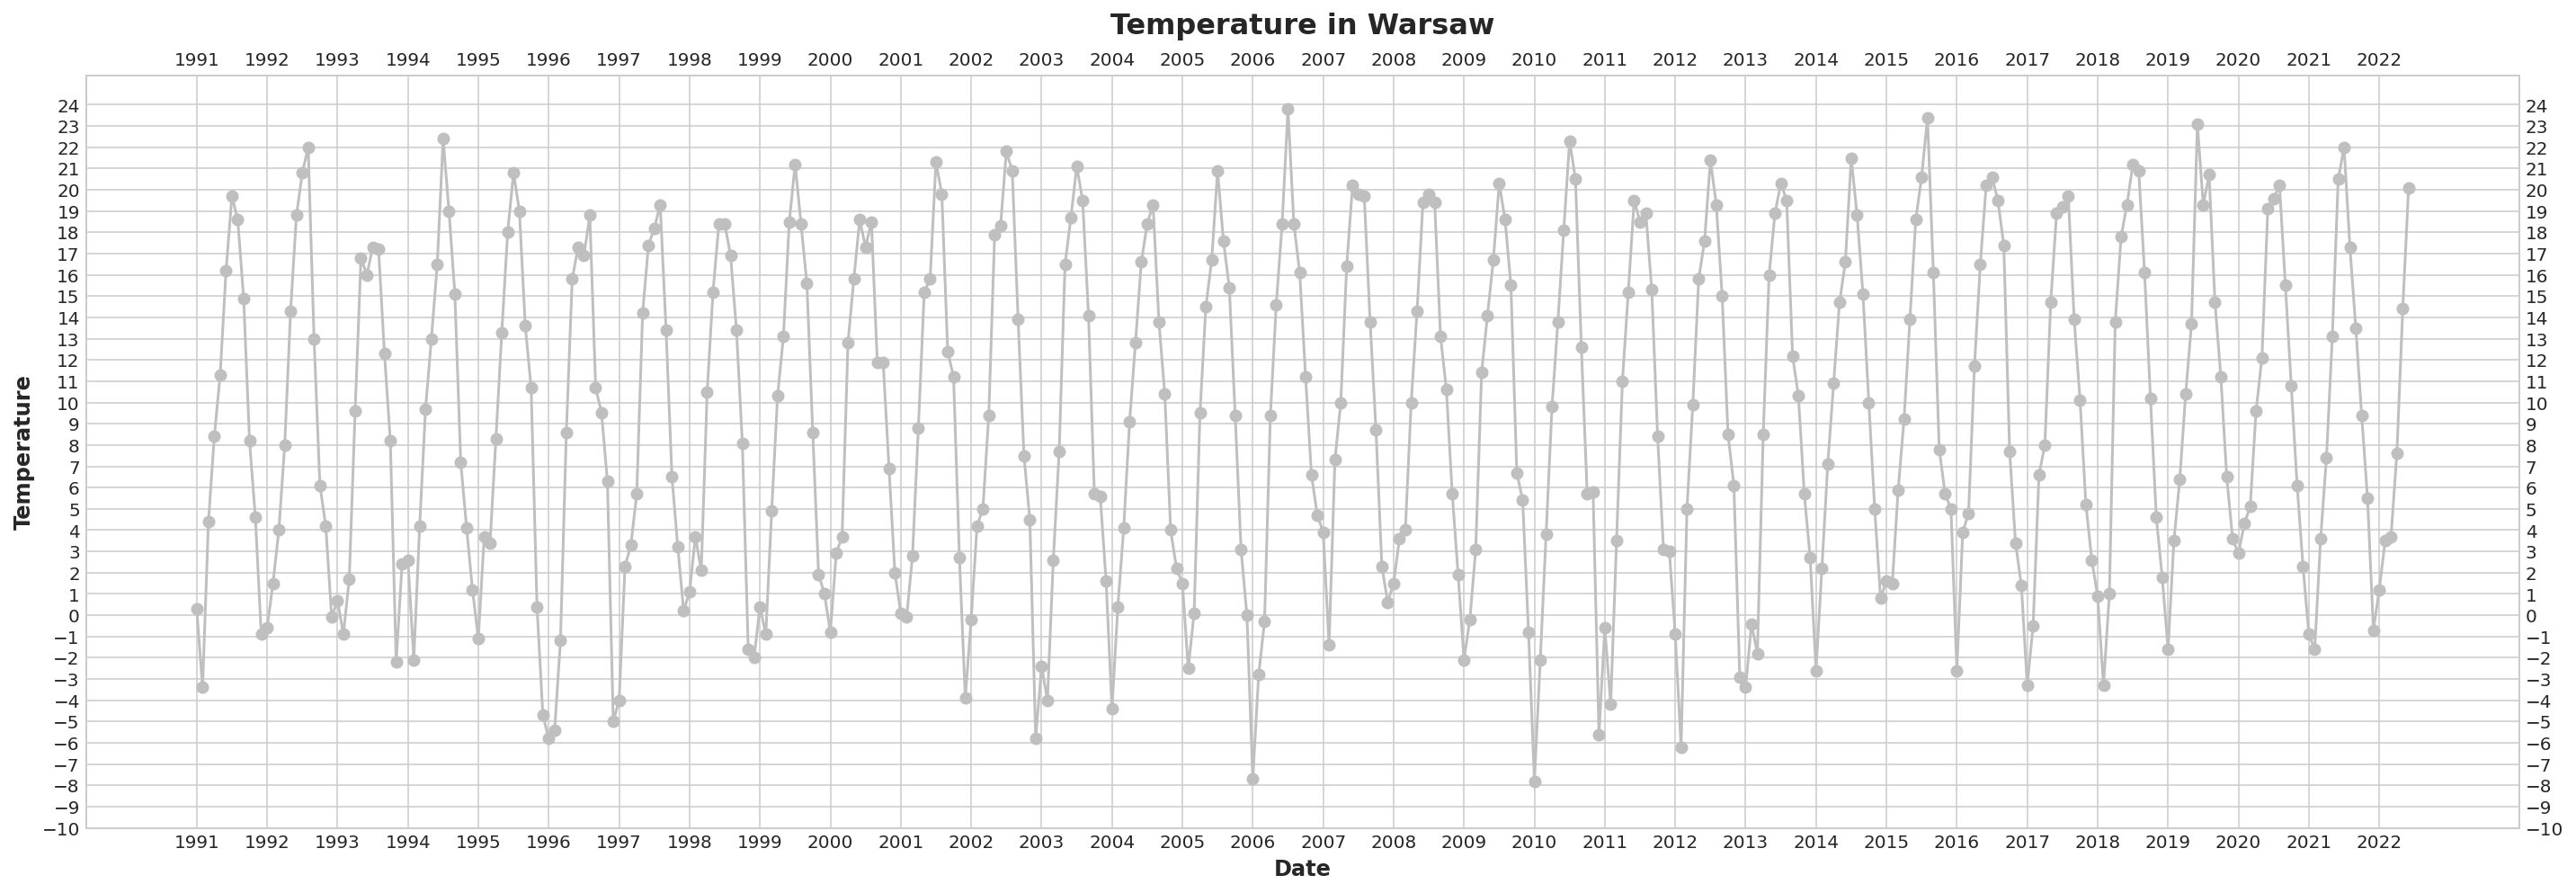

In [8]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, marker='.', color='0.75', markersize=12)

ax.set(ylabel='Temperature',
       xlabel='Date',
       title='Temperature in Warsaw',
       xticks= np.arange(0, len(df), step=12),
       xticklabels= df.index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),
        );



In [9]:
test = df.iloc[-6:]
df = df.iloc[:-6]

# **TABLE OF CONTENT**
# 1. Fit a lag feature to DataFrame
# 2. Make moving average and trend
# 3. Seasonality
# 4. Time series as features
# 5. Hybrid models
# 6. Forecasting With Machine Learning:
# * 6.1 Recusive strategy
# * 6.2 Direct strategy
# 7. Summary

# **1) Fit a lag feature to DataFrame**

In [10]:
ts_1 = df['Monthly average temperature (°C)']
lag_1 = df['Monthly average temperature (°C)'].shift(1)
df_1 = pd.DataFrame({'Temperature': ts_1.values, 'Lag_1': lag_1.values }, index = ts_1.index)

In [11]:
X_1 = df_1.loc[:, ['Lag_1']]
X_1.dropna(inplace=True)
y_1 = df_1.loc[:, 'Temperature']
y_1, X_1 = y_1.align(X_1, join='inner')

In [12]:
model_1 = LinearRegression().fit(X_1,y_1)

y_pred_1 = pd.Series(model_1.predict(X_1), index=X_1.index)

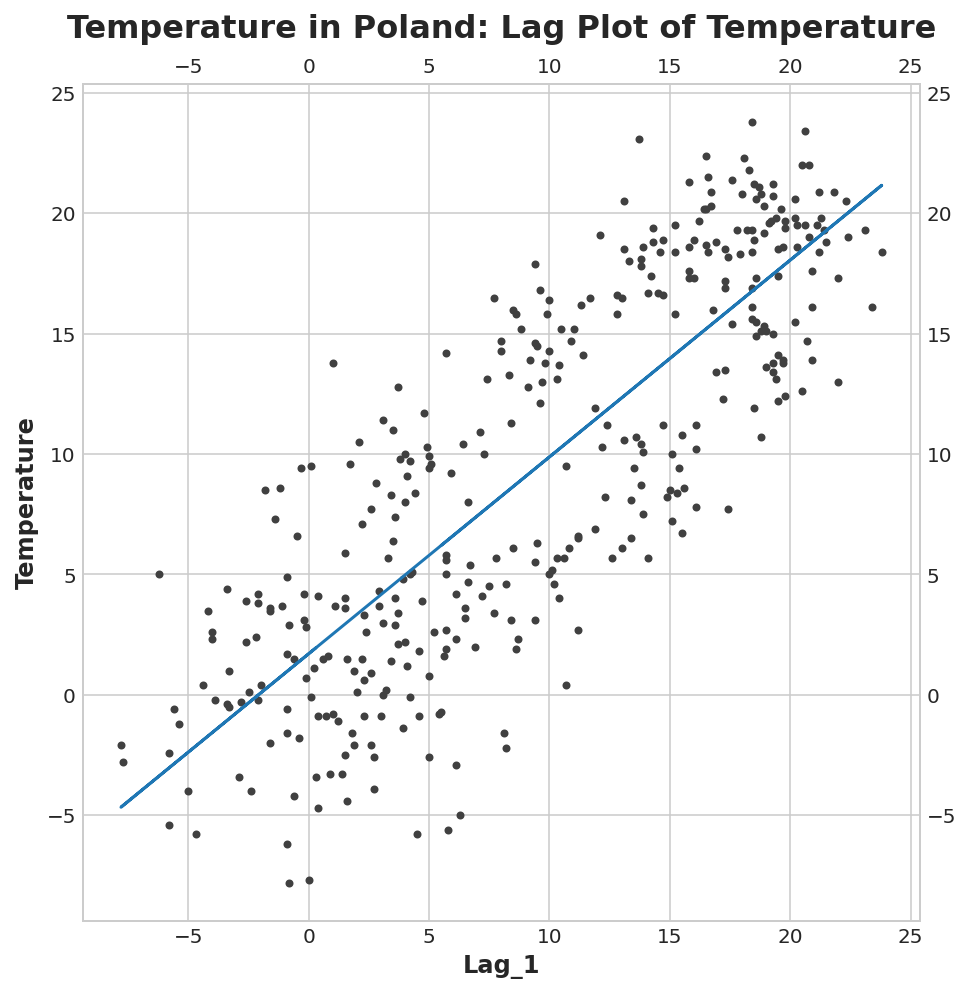

In [13]:
fig, ax = plt.subplots()
ax.plot(X_1['Lag_1'], y_1, '.', color='0.25')
ax.plot(X_1['Lag_1'], y_pred_1)

ax.set(aspect='equal',
       ylabel='Temperature',
       xlabel='Lag_1',
       title='Temperature in Poland: Lag Plot of Temperature');

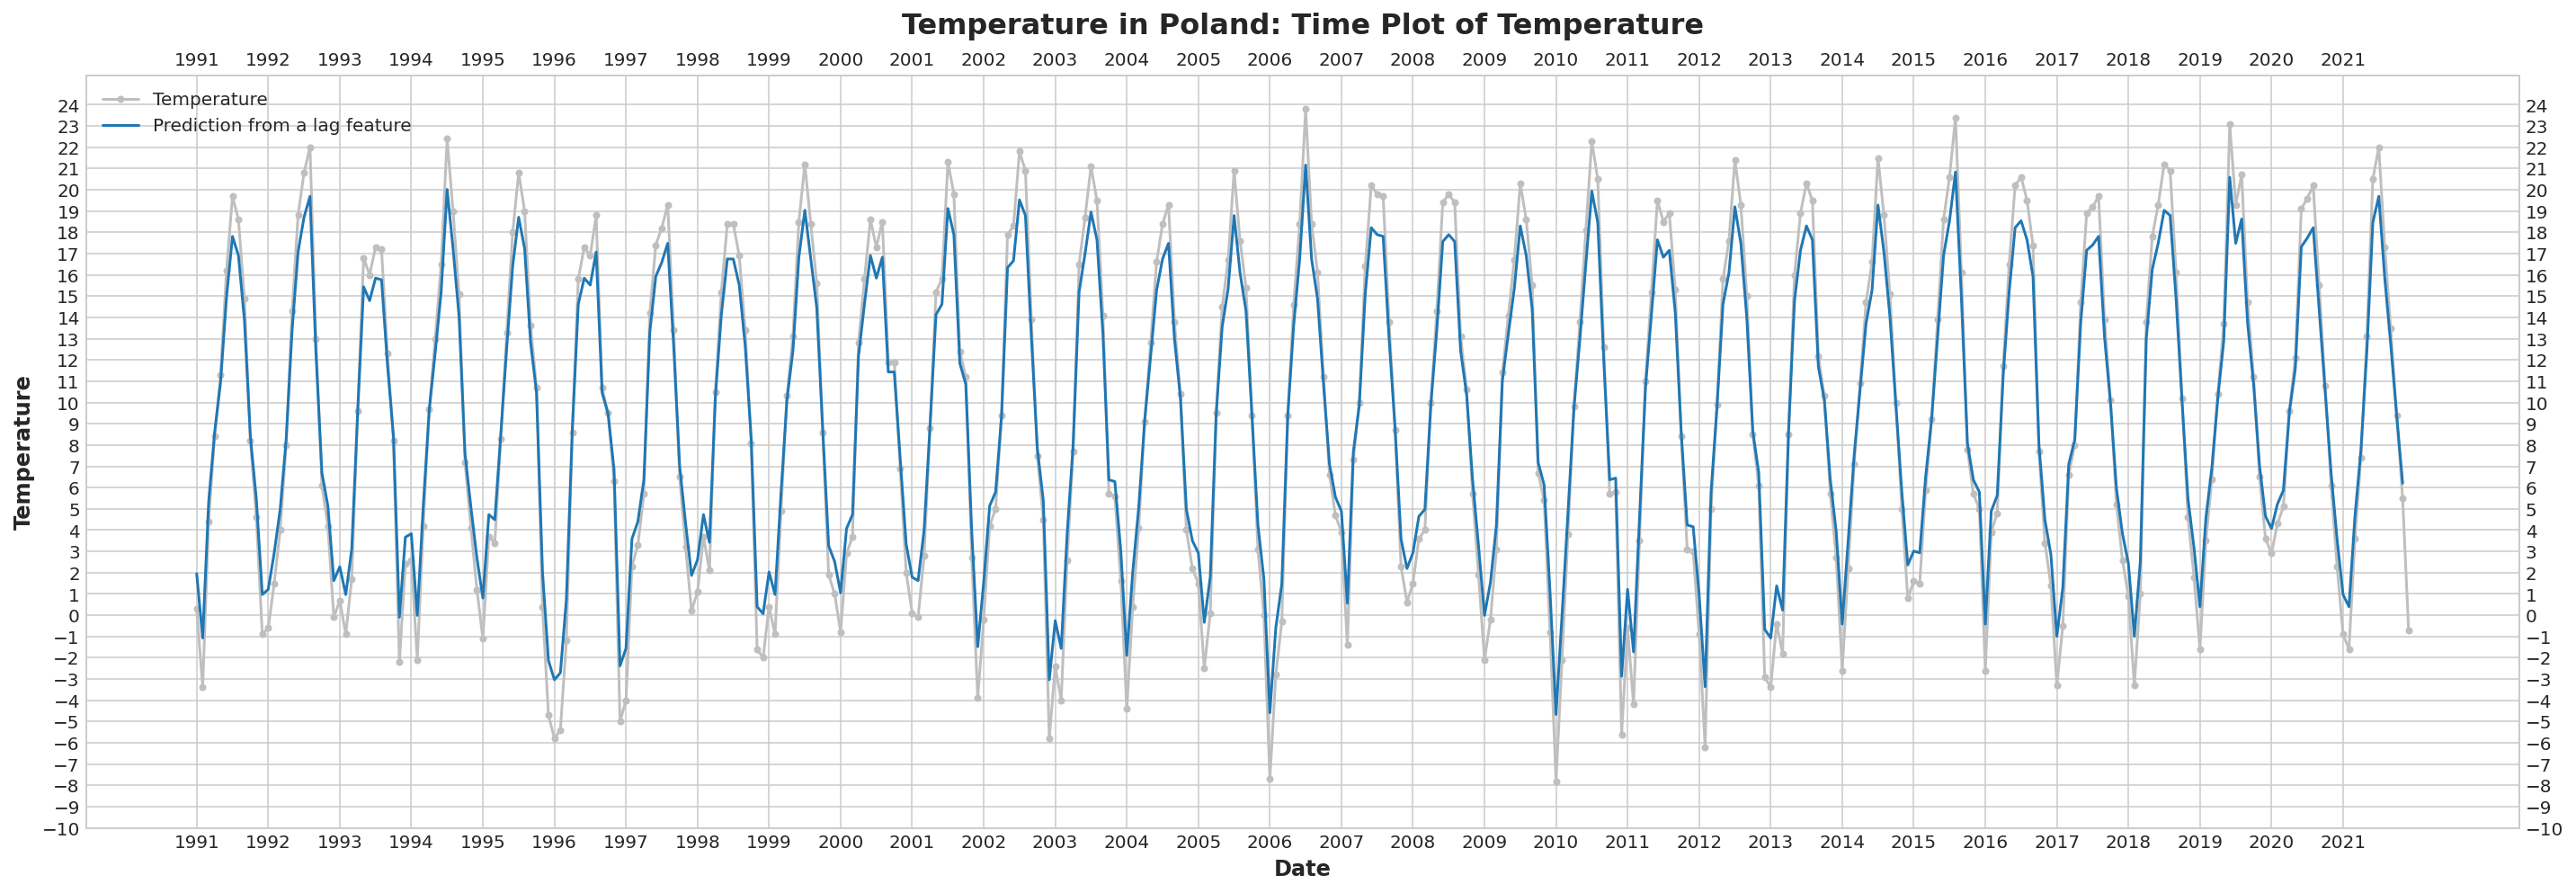

In [14]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, marker='.', color='0.75')
ax.plot(y_pred_1.values)

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Time Plot of Temperature',
       xticks= np.arange(0, len(y_1), step=12),
       xticklabels= y_1.index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),
        );
ax.legend(['Temperature','Prediction from a lag feature']);

# **2) Make moving average and trend**

In [15]:
y_2 = df['Monthly average temperature (°C)']  

dp_2 = DeterministicProcess(
    index=df.index,  
    constant=True,       
    order=1,             
    drop=True,           
)

X_2 = dp_2.in_sample()

In [16]:
moving_average = df['Monthly average temperature (°C)'].rolling(
    window=12,       
    center=True,      
    min_periods=6,  
).mean()         

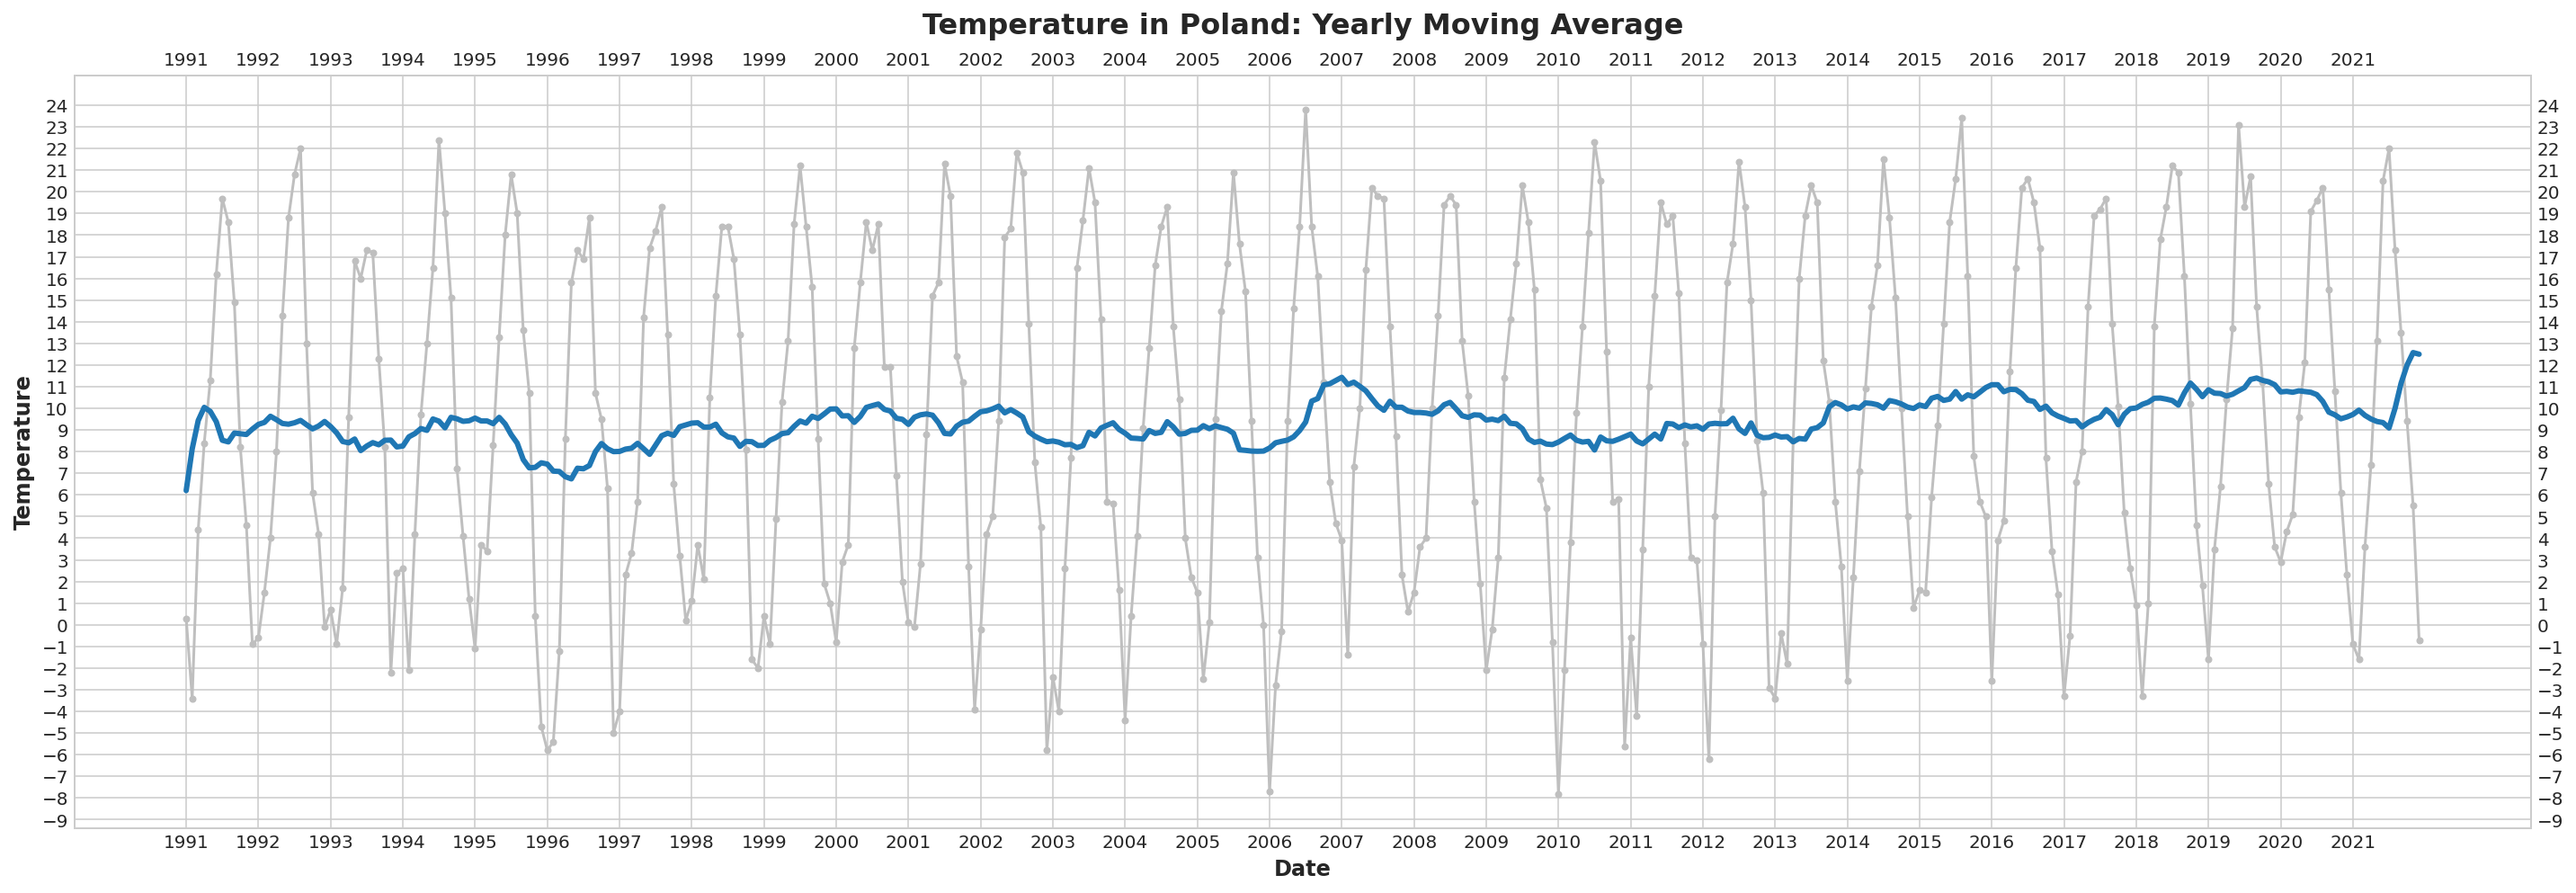

In [17]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, marker='.', color='0.75')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Yearly Moving Average',
       xticks= np.arange(0, len(df), step=12),
       xticklabels= df.index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),)
ax.plot(moving_average.values, linewidth=3);

In [18]:
model_2 = LinearRegression(fit_intercept=False)
model_2.fit(X_2, y_2)

y_pred_2 = pd.Series(model_2.predict(X_2), index=X_2.index)
X_fore_2 = dp_2.out_of_sample(steps=steps)
y_fore_2 = pd.Series(model_2.predict(X_fore_2), index=X_fore_2.index)

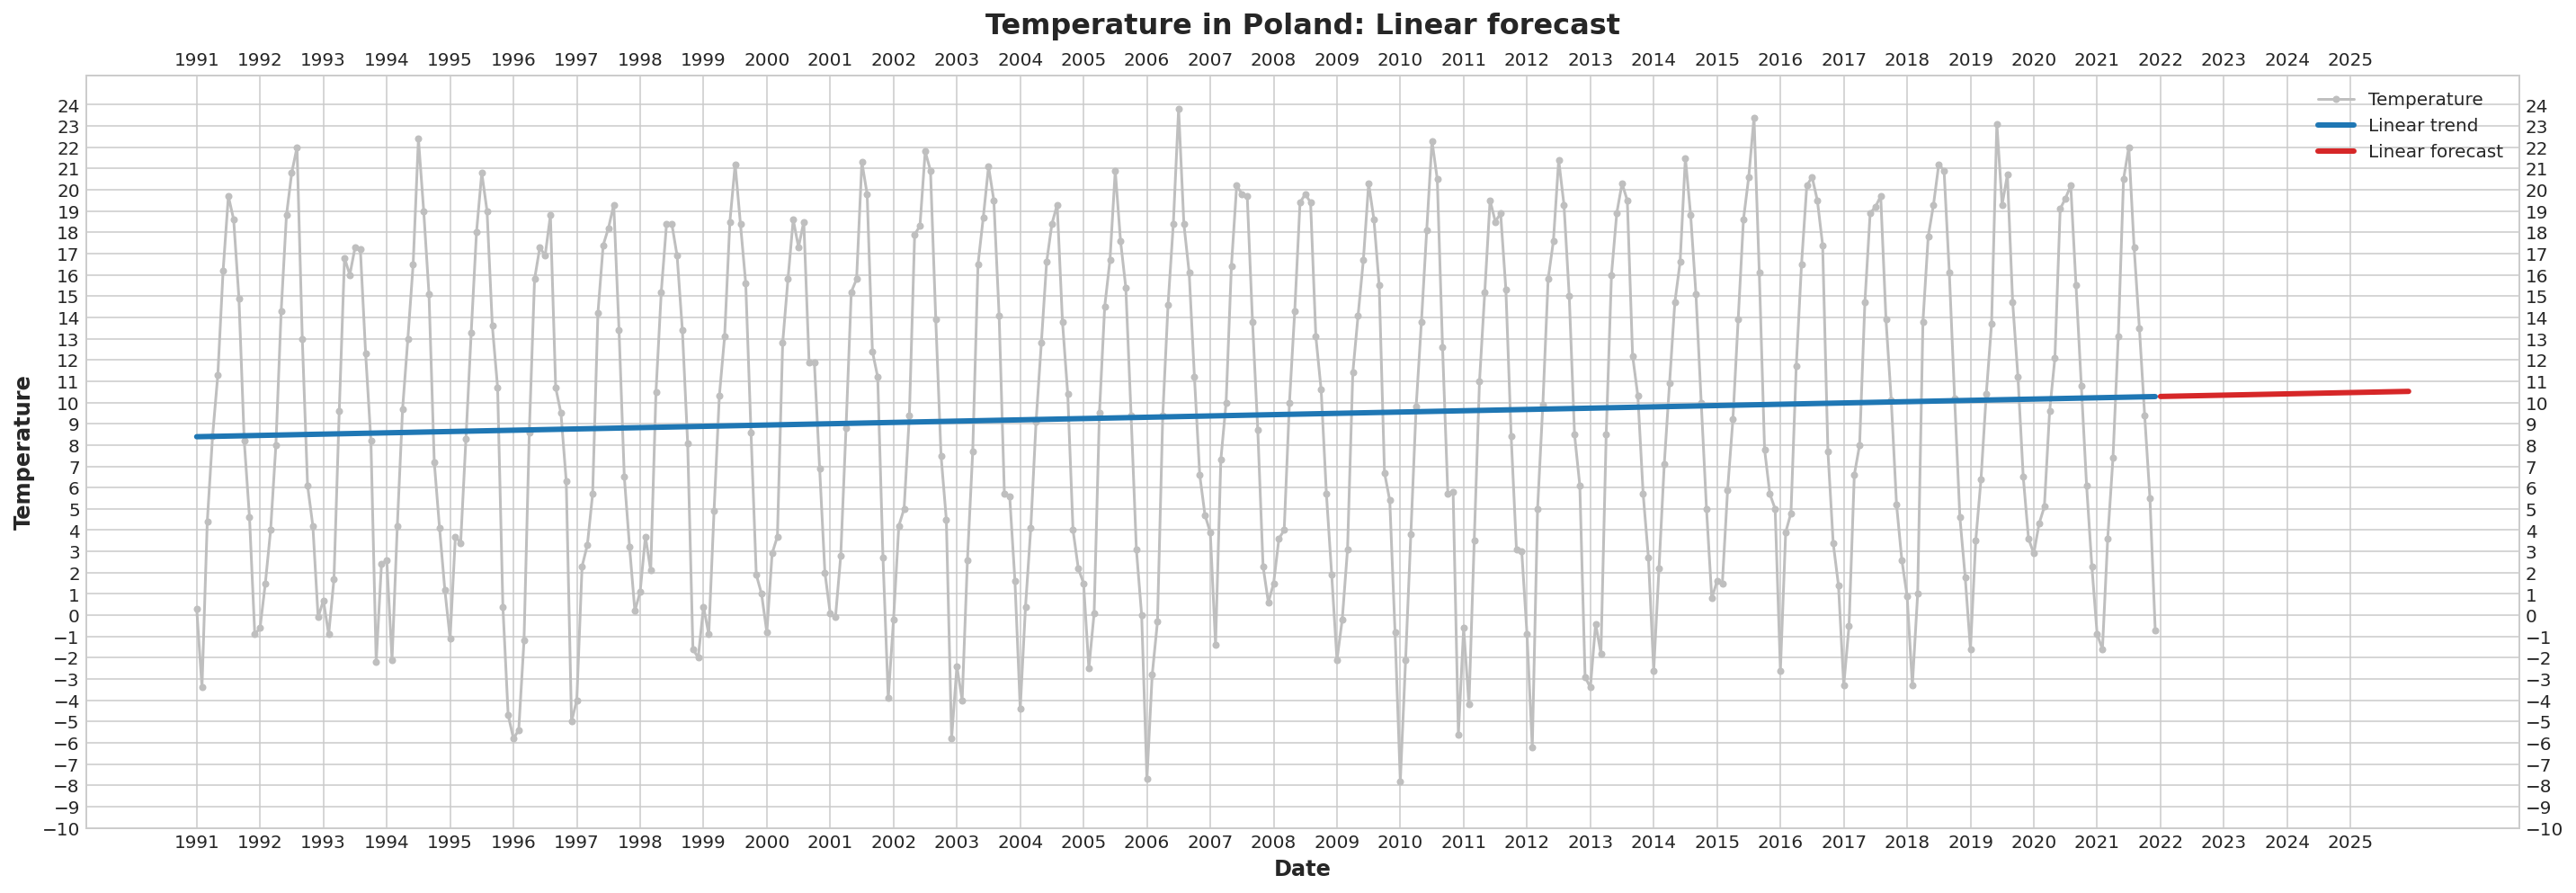

In [19]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, marker='.', color='0.75');
ax.plot(y_pred_2.values, linewidth=3);
ax.plot(np.append(np.zeros(len(y_pred_2)) + np.nan,y_fore_2.values), linewidth=3, color='C3');

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Linear forecast',
       xticks= np.arange(0, len(X_2+X_fore_2), step=12),
       xticklabels= (X_2+X_fore_2).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Linear trend','Linear forecast']);

# **3) Seasonality**

In [20]:
y_3 = df['Monthly average temperature (°C)']

fourier_3 = CalendarFourier(freq='A', order=2)  

dp_3 = DeterministicProcess(
    index=y_3.index,
    constant=True,               
    order=1,                     
    seasonal=True,               
    additional_terms=[fourier_3],  
    drop=True                   
)

X_3 = dp_3.in_sample()  

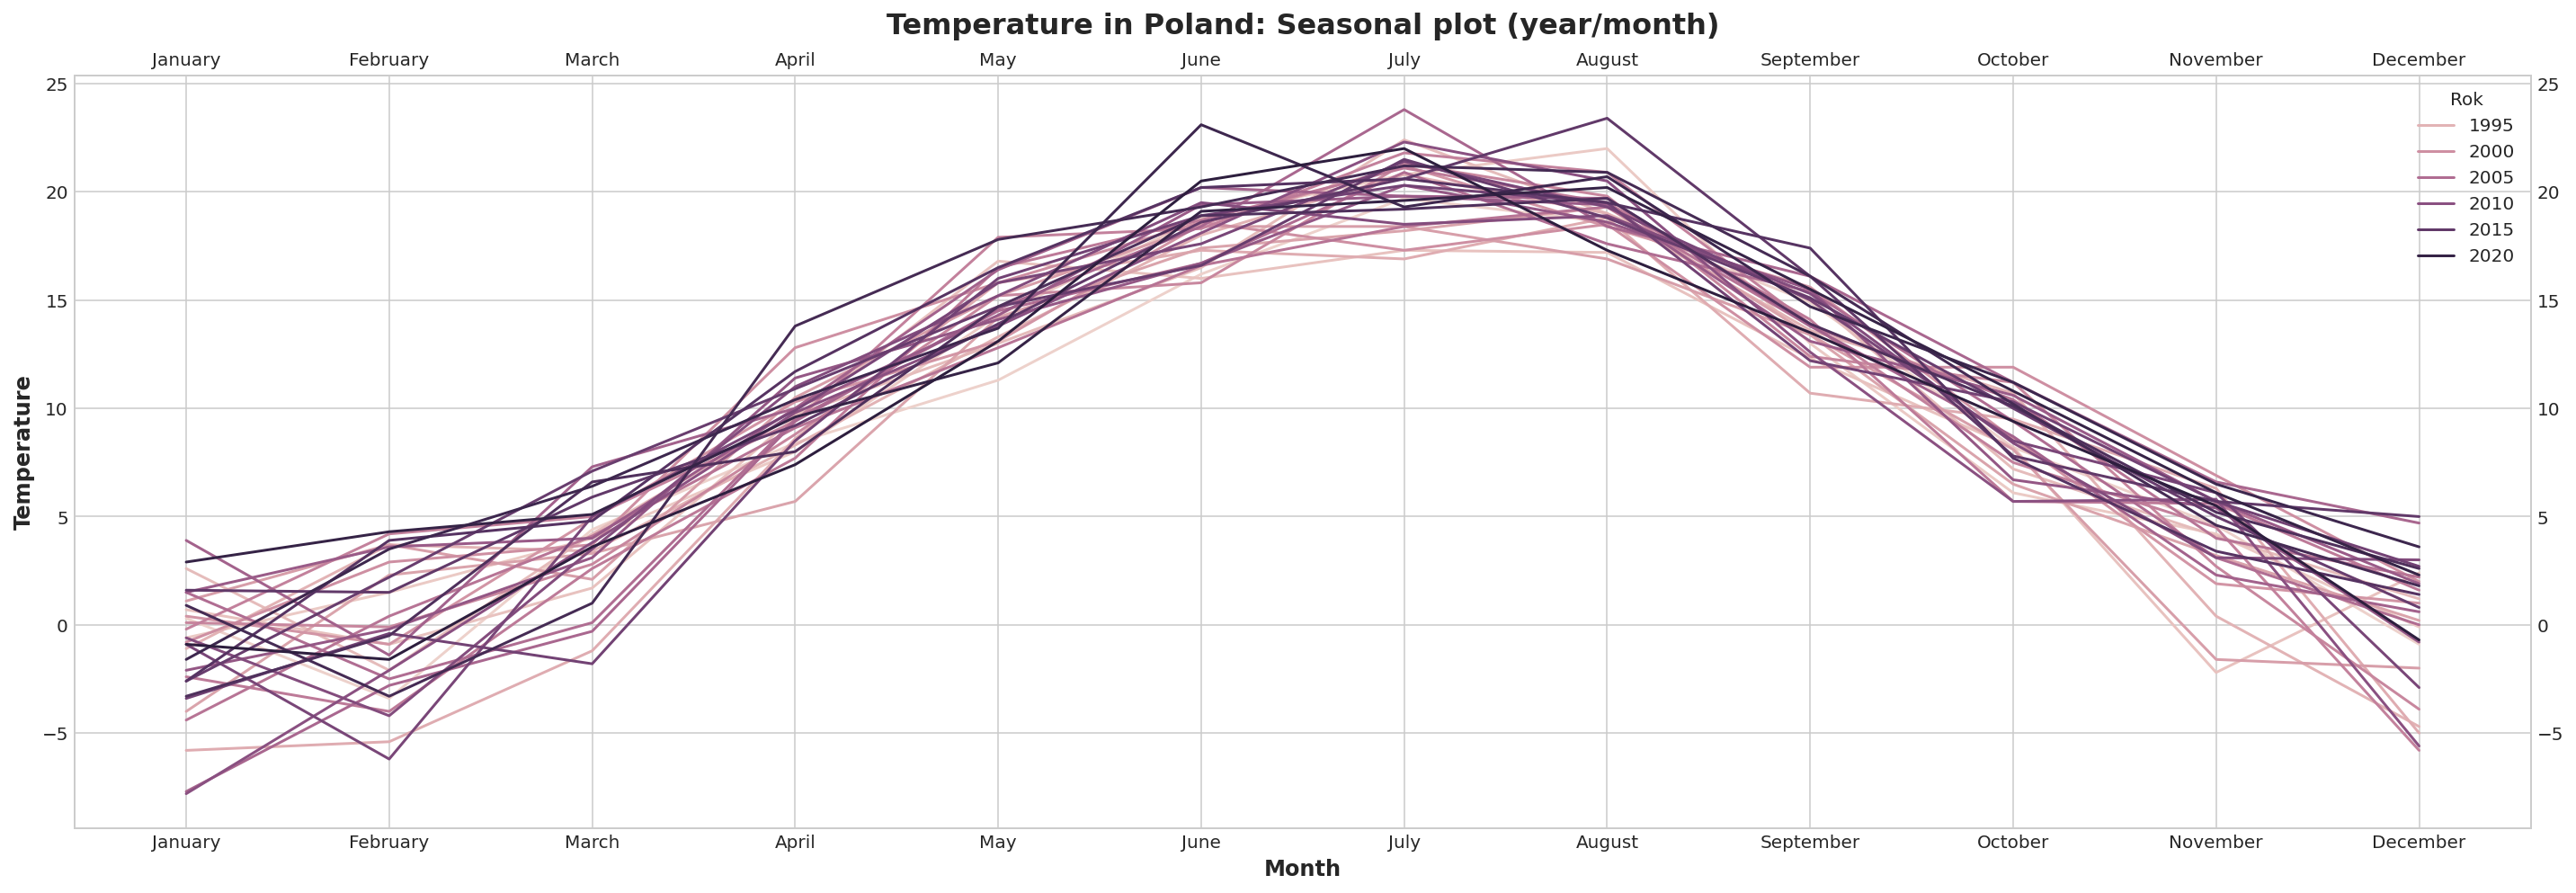

In [21]:
fig, ax = plt.subplots()
ax = sns.lineplot(x='Miesiąc', y='Monthly average temperature (°C)', hue='Rok', data=df);
ax.set(ylabel='Temperature',
       xlabel='Month', 
       title='Temperature in Poland: Seasonal plot (year/month)',
       xticks= [1,2,3,4,5,6,7,8,9,10,11,12],
       xticklabels= ['January', 'February', 'March', 'April', 'May', 'June', 
                     'July', 'August', 'September', 'October', 'November', 'December']);

In [22]:
freqencies_3, spectrum_3 = periodogram(
    x=df['Monthly average temperature (°C)'],
    fs=12,
    detrend='linear',
    window='boxcar',
    scaling='spectrum',
)

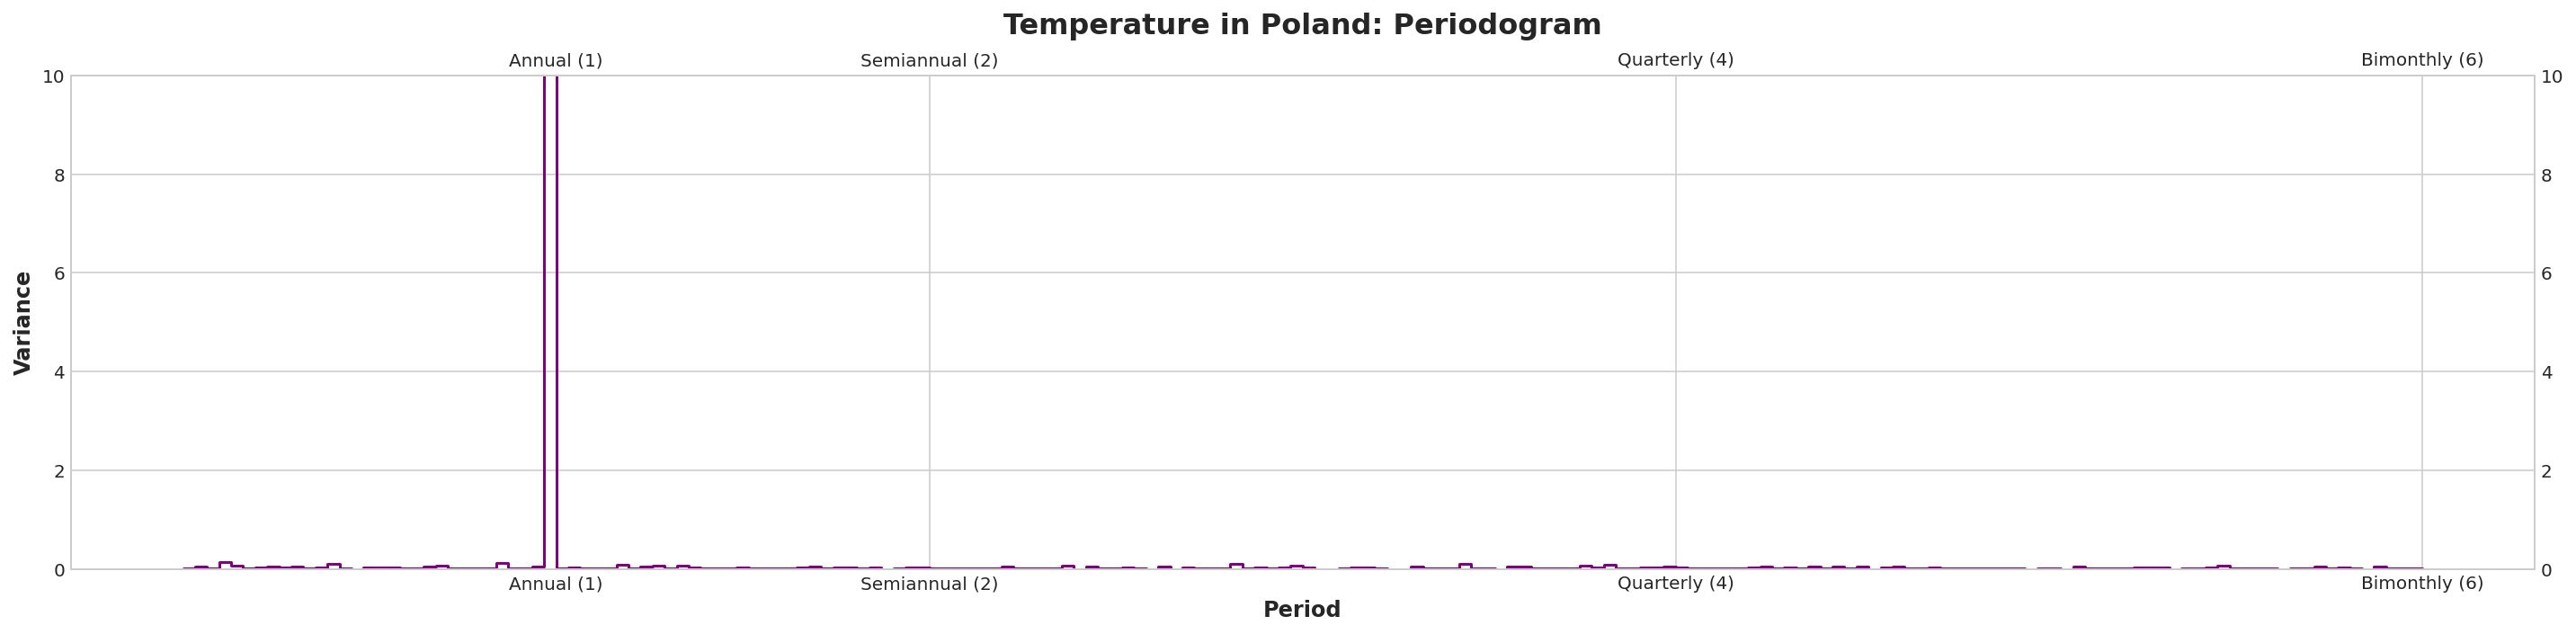

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
ax.step(freqencies_3, spectrum_3, color='purple');
ax.set(xlabel='Period',
       ylabel='Variance',
       title='Temperature in Poland: Periodogram',
       xticks=[1, 2, 4, 6],
       xticklabels=['Annual (1)','Semiannual (2)','Quarterly (4)','Bimonthly (6)'],
       ylim = (0, 10),
      );

In [24]:
model_3 = LinearRegression(fit_intercept=False)
model_3.fit(X_3, y_3)

y_pred_3 = pd.Series(model_3.predict(X_3), index=X_3.index)
X_fore_3 = dp_3.out_of_sample(steps=steps)
y_fore_3 = pd.Series(model_3.predict(X_fore_3), index=X_fore_3.index)

y_deseason_3 = y_3 - y_pred_3

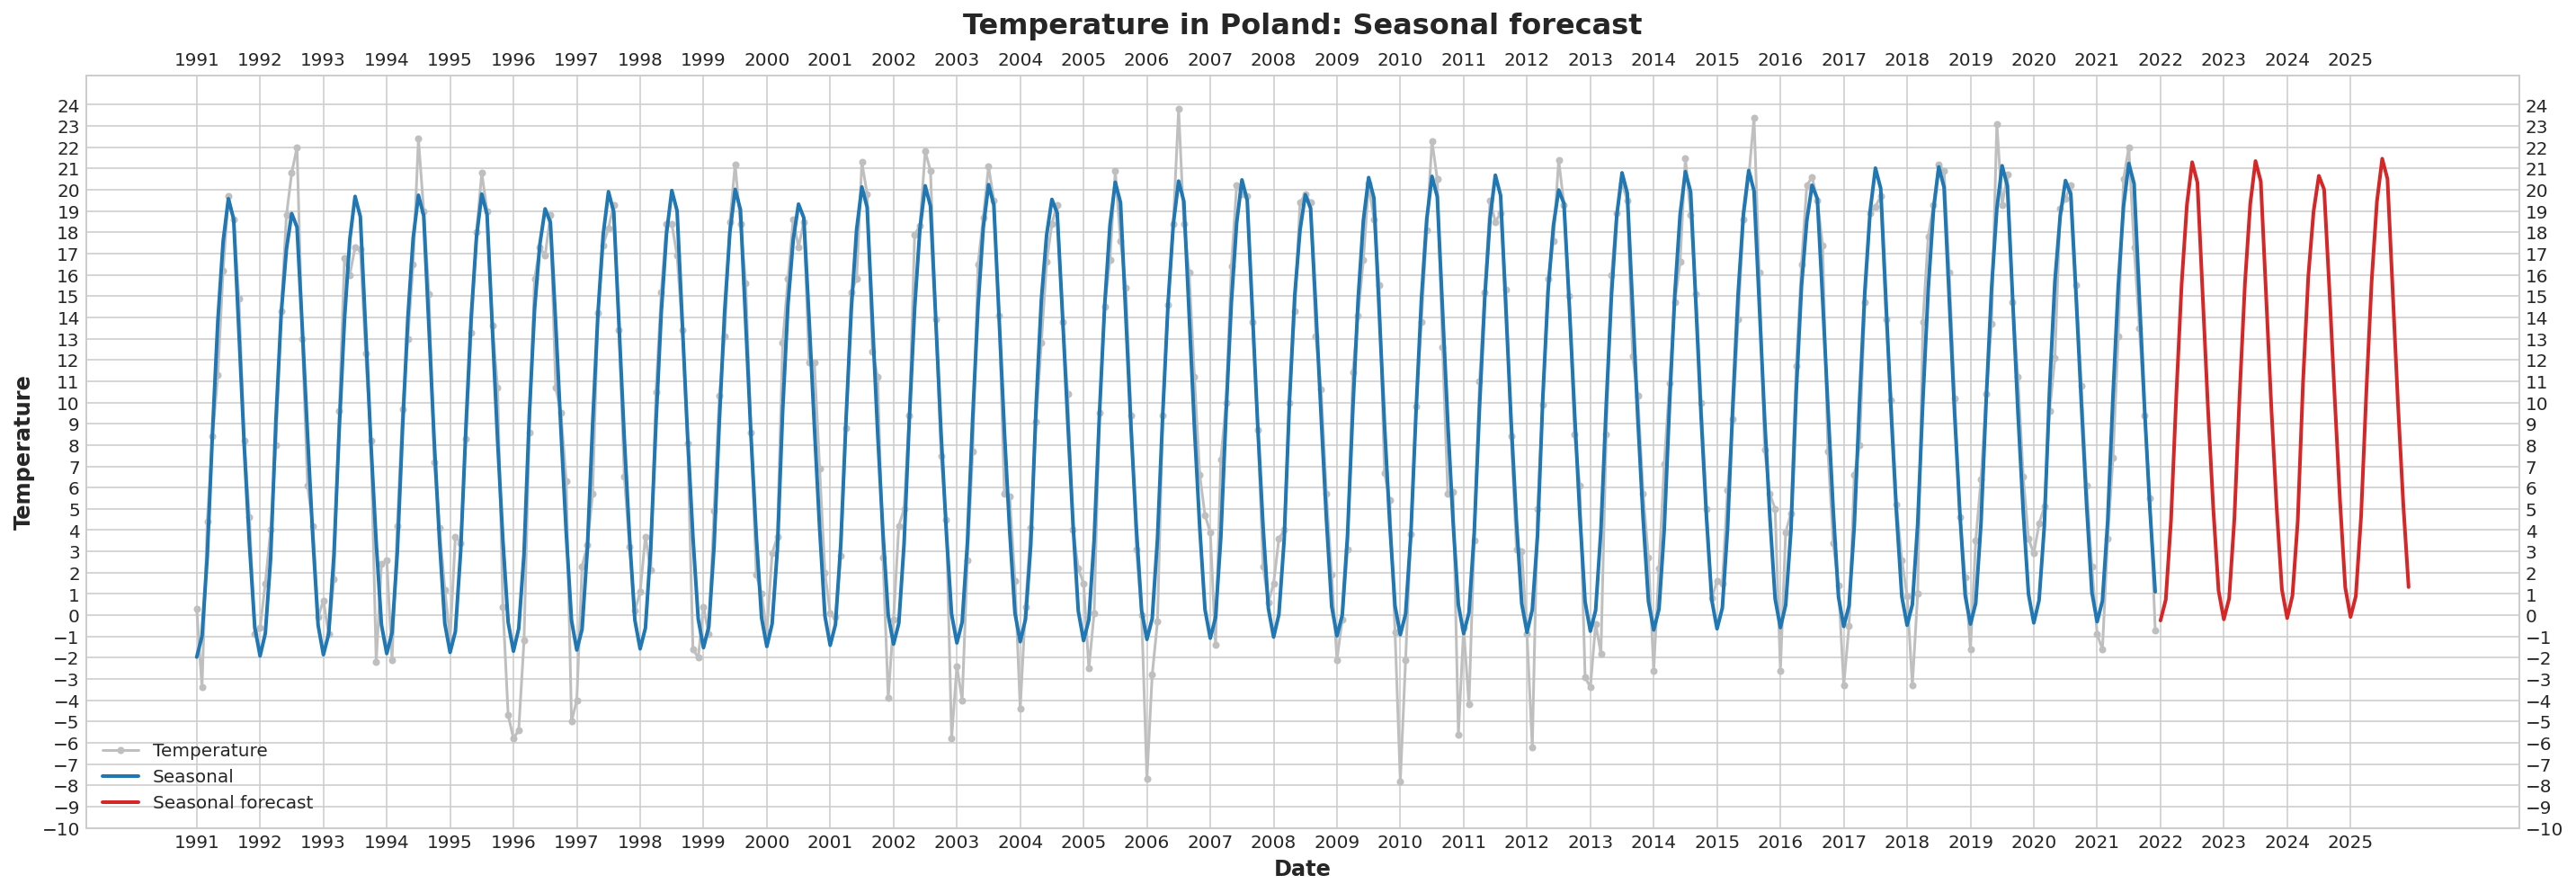

In [25]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, marker='.', color='0.75')
ax.plot(y_pred_3.values, linewidth=2);
ax.plot(np.append(np.zeros(len(y_pred_3)) + np.nan,y_fore_3.values), color='C3', linewidth=2);
ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Seasonal forecast',
       xticks= np.arange(0, len(X_2+X_fore_3), step=12),
       xticklabels= (X_2+X_fore_3).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Seasonal','Seasonal forecast']);

In [26]:
freqencies_3_1, spectrum_3_1 = periodogram(
    x=y_deseason_3,
    fs=12,
    detrend='linear',
    window='boxcar',
    scaling='spectrum',
)

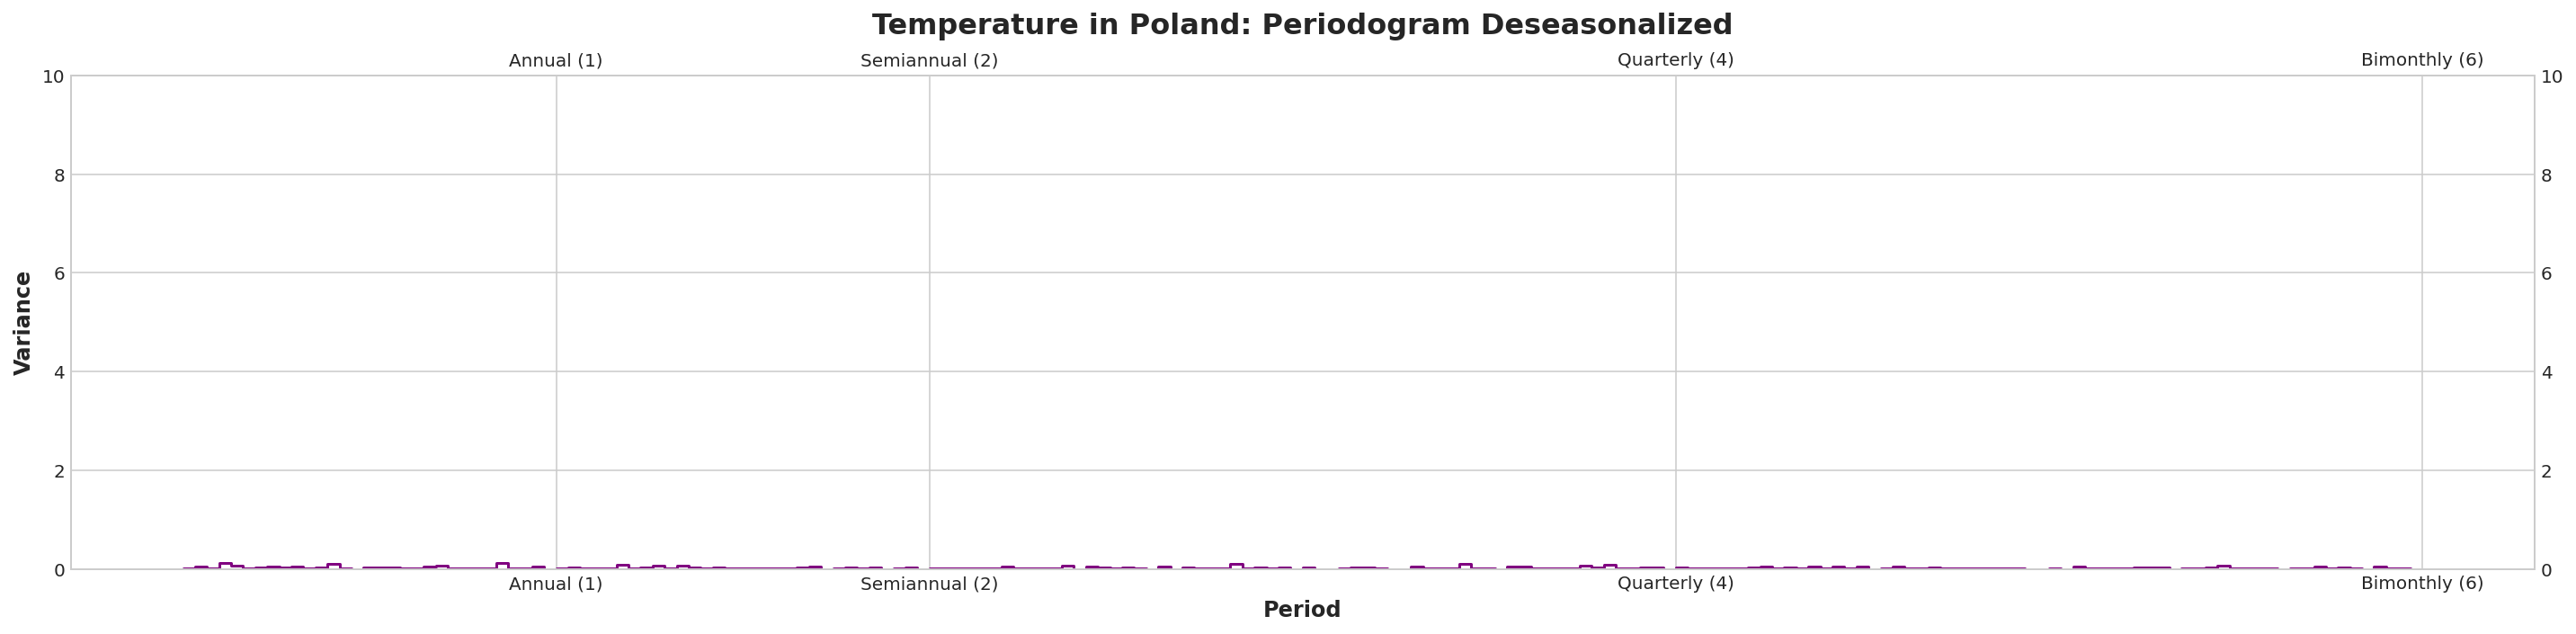

In [27]:
fig, ax = plt.subplots(figsize=(20,5))
ax.step(freqencies_3_1, spectrum_3_1, color='purple');
ax.set(xlabel='Period',
       ylabel='Variance',
       title='Temperature in Poland: Periodogram Deseasonalized',
       xticks=[1, 2, 4, 6],
       xticklabels=['Annual (1)','Semiannual (2)','Quarterly (4)','Bimonthly (6)'],
       ylim = (0, 10),
      );


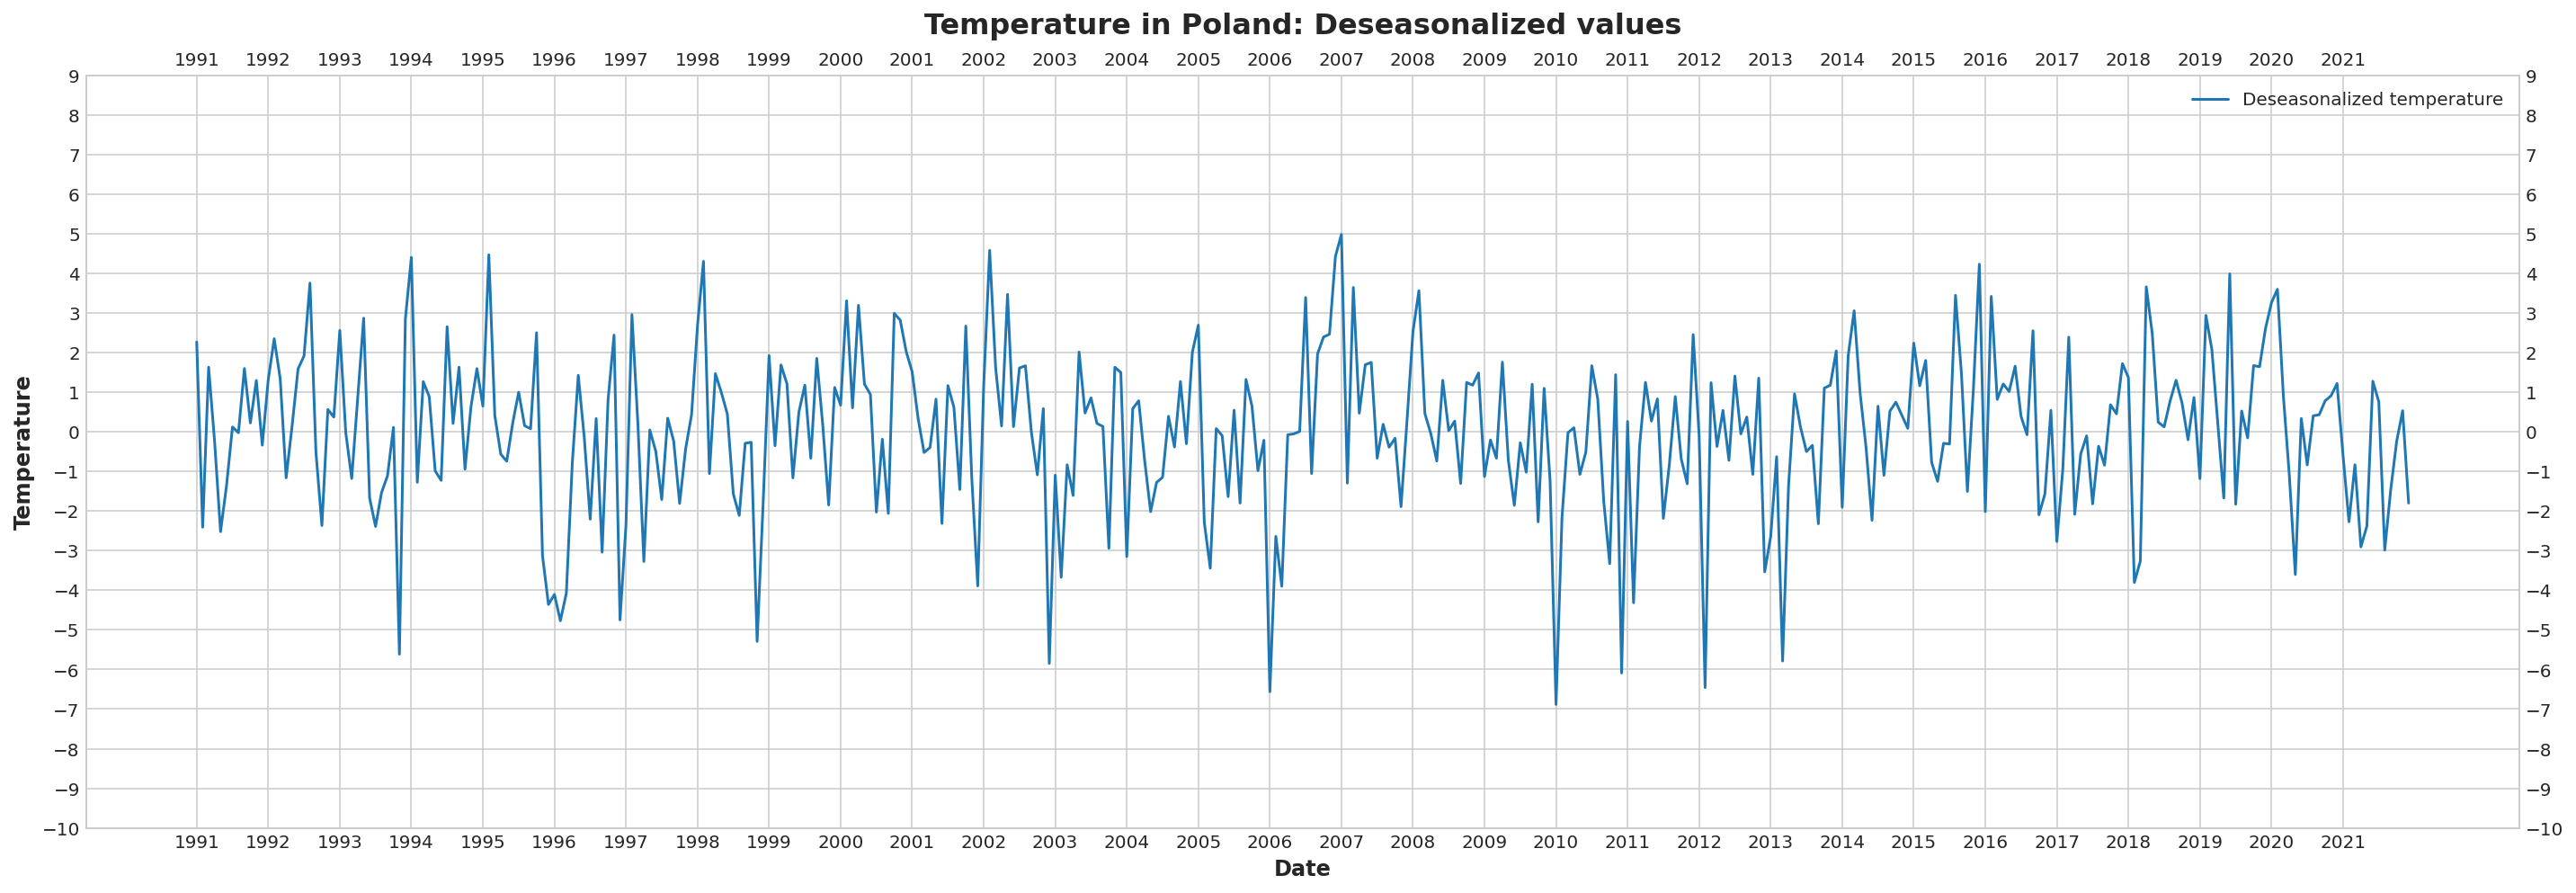

In [28]:
fig, ax = plt.subplots()
ax.plot(y_deseason_3.values)

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Deseasonalized values',
       xticks= np.arange(0, len(y_deseason_3), step=12),
       xticklabels= (y_deseason_3).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 10, step=1));
ax.legend(['Deseasonalized temperature']);

# **4) Time series as features**

In [29]:
y_4 = df['Monthly average temperature (°C)']

fourier_4 = CalendarFourier(freq='A', order=2)  

dp_4 = DeterministicProcess(
    index=y_4.index,
    constant=True,               
    order=1,                     
    seasonal=True,               
    additional_terms=[fourier_4],  
    drop=True                   
)

X_4 = dp_4.in_sample()  

In [30]:
model_4 = LinearRegression(fit_intercept=False)
model_4.fit(X_4, y_4)
y_deseason_4 = y_4 - model_4.predict(X_4)

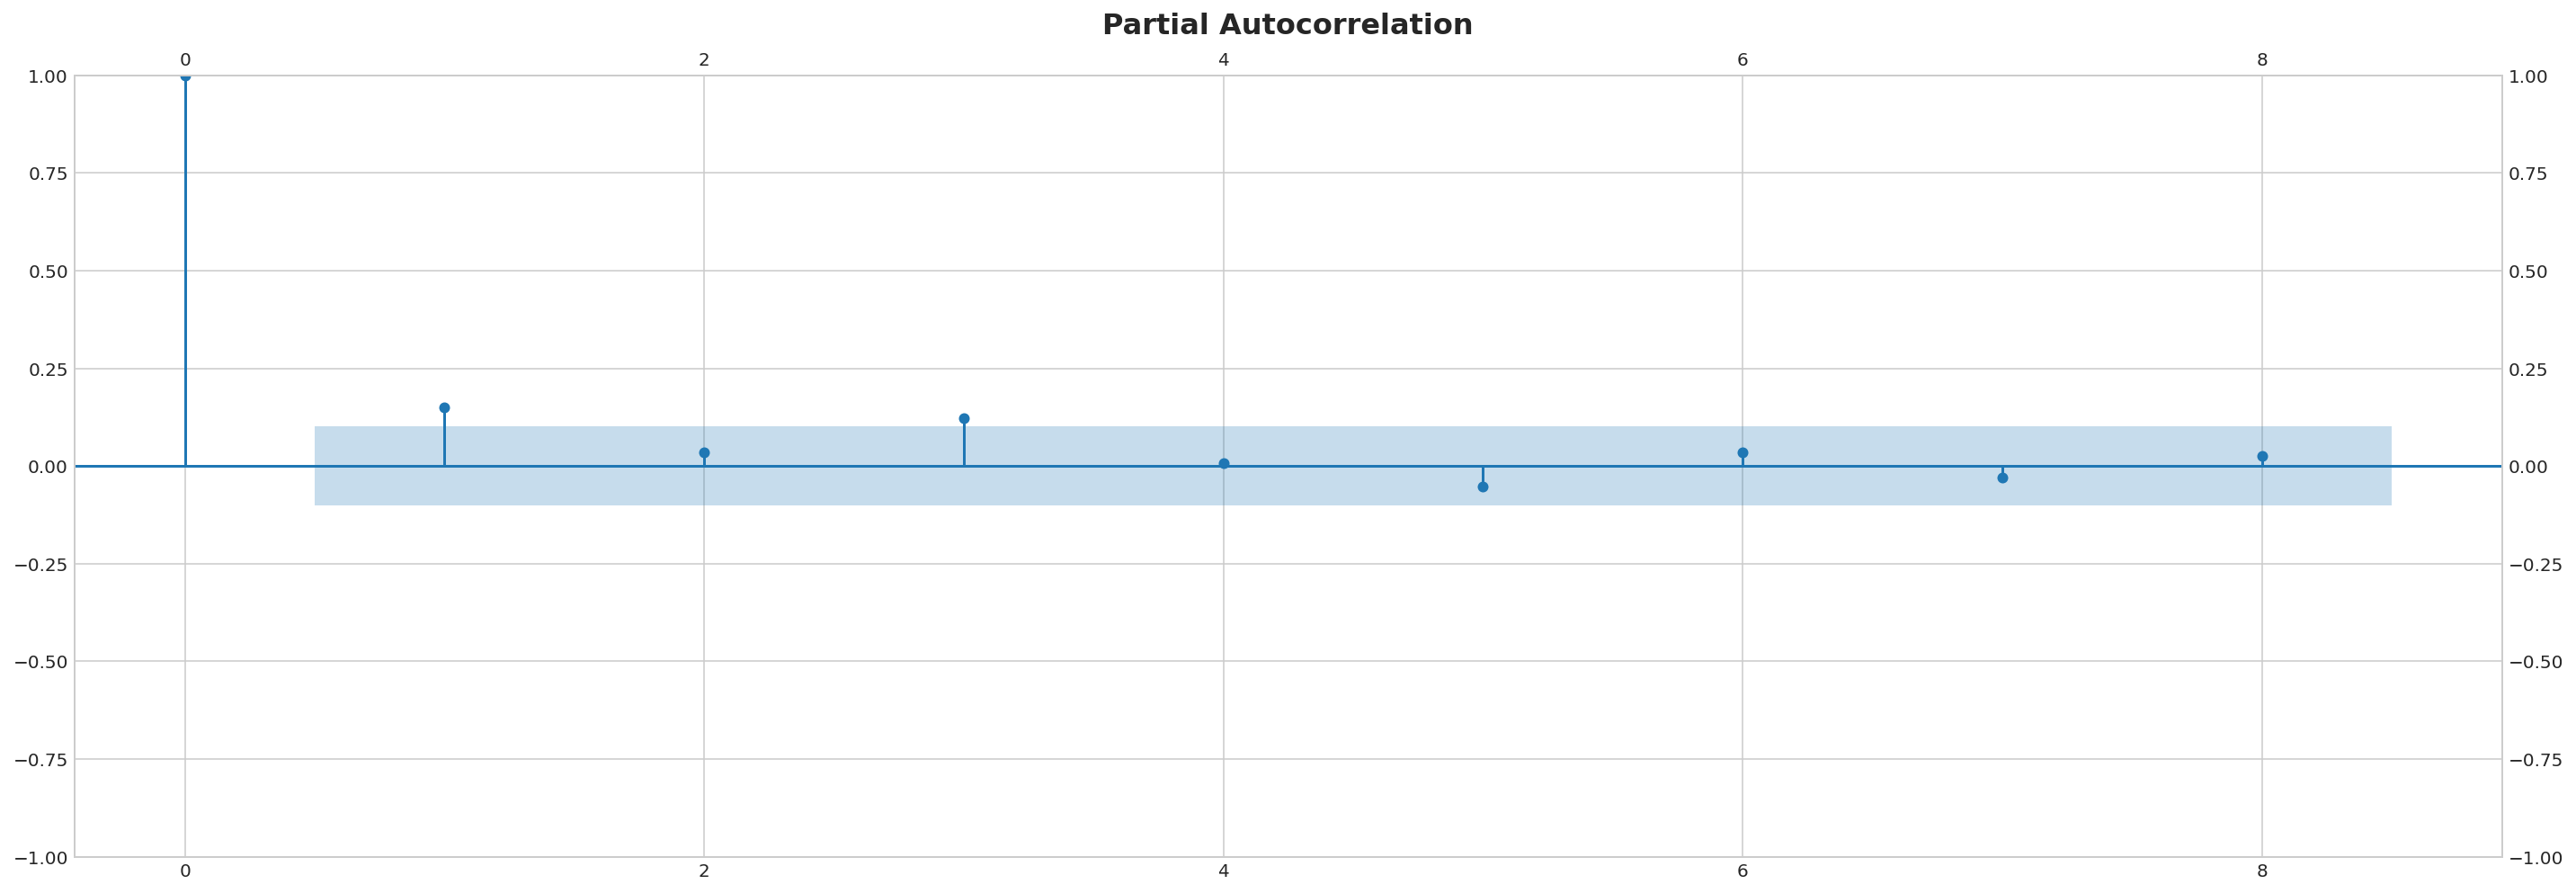

In [31]:
plot_pacf(y_deseason_4, lags=8);

In [32]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=48, shuffle=False)

model_4 = LinearRegression(fit_intercept=False)  
model_4.fit(X_train_4, y_train_4)
y_fit_4 = pd.Series(model_4.predict(X_train_4), index=y_train_4.index)
y_pred_4 = pd.Series(model_4.predict(X_test_4), index=y_test_4.index)

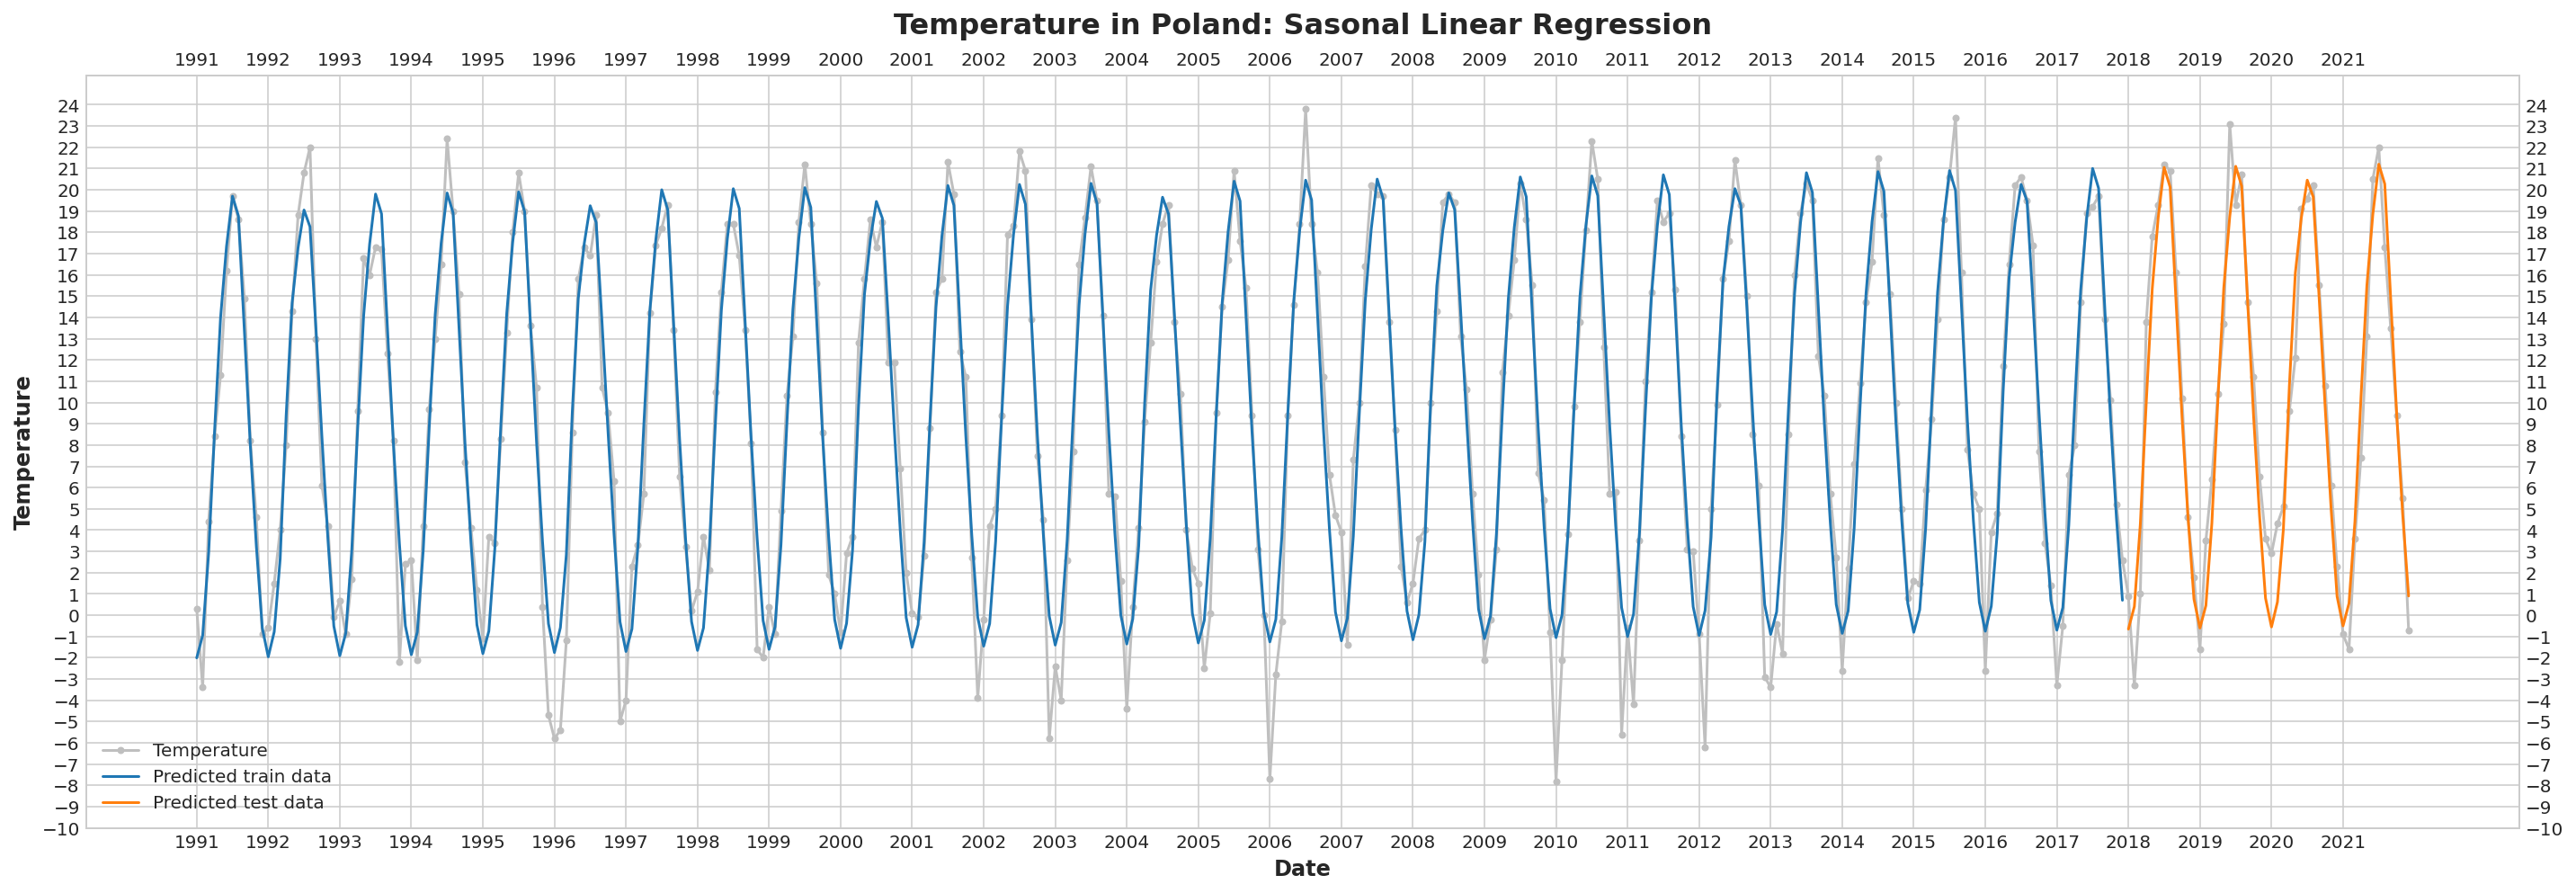

In [33]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75', marker='.')
ax.plot(y_fit_4.values)
ax.plot((np.append(np.zeros(len(y_fit_4))+np.nan, y_pred_4.values)))

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Sasonal Linear Regression',
       xticks= np.arange(0, len(X_4), step=12),
       xticklabels= (X_4).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Predicted train data','Predicted test data']);

In [34]:
X_4_1 = pd.concat([X_4, y_deseason_4.shift(1)], axis=1)
X_4_1.fillna(0.0, inplace=True)

In [35]:
X_train_4_1, X_test_4_1, y_train_4_1, y_test_4_1 = train_test_split(X_4_1, y_4, test_size=48, shuffle=False)

model_4_1 = LinearRegression(fit_intercept=False)  
model_4_1.fit(X_train_4_1, y_train_4_1)
y_fit_4_1 = pd.Series(model_4_1.predict(X_train_4_1), index=y_train_4_1.index)
y_pred_4_1 = pd.Series(model_4_1.predict(X_test_4_1), index=y_test_4_1.index)

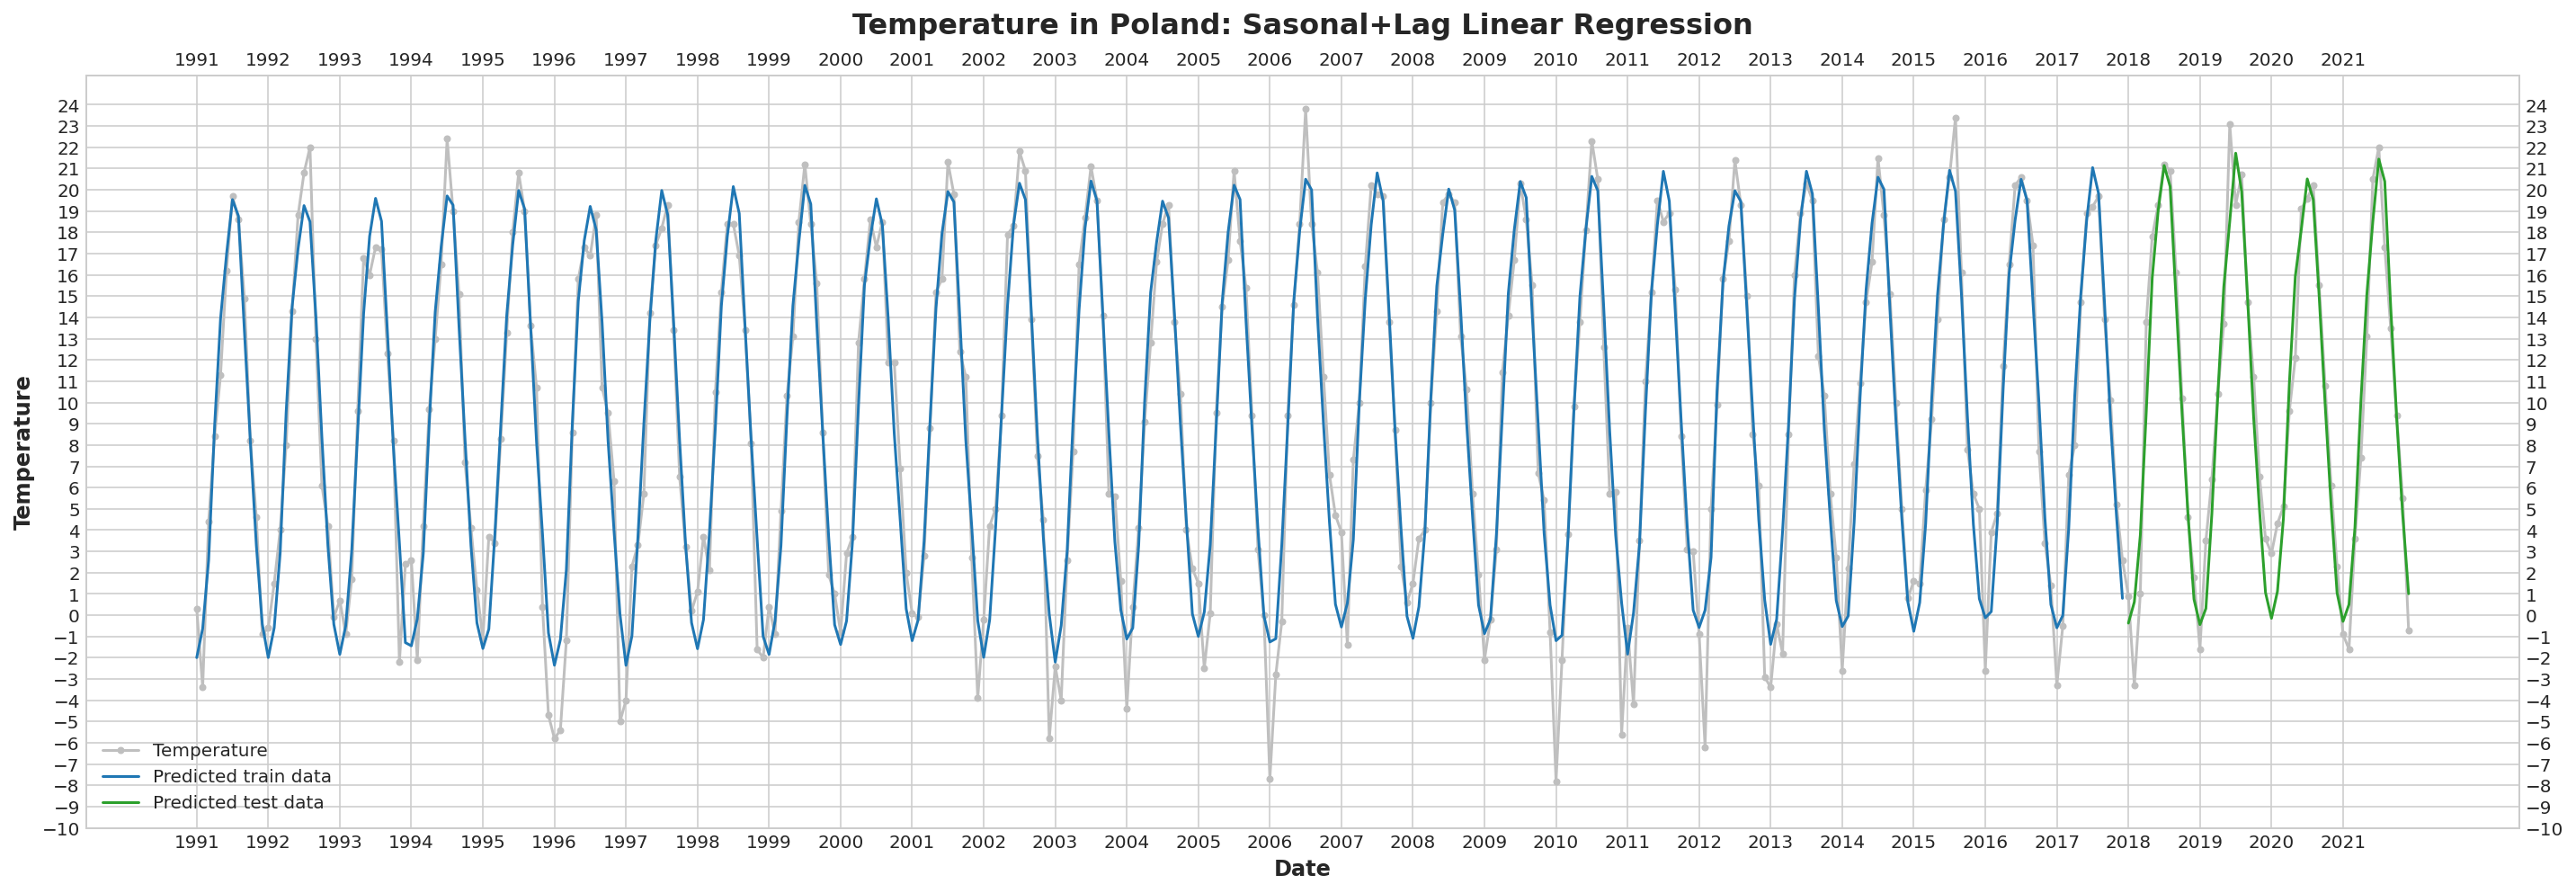

In [36]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75', marker='.')
ax.plot(y_fit_4_1.values)
ax.plot((np.append(np.zeros(len(y_fit_4_1))+np.nan, y_pred_4_1.values)), color='C2')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Sasonal+Lag Linear Regression',
       xticks= np.arange(0, len(X_4_1), step=12),
       xticklabels= (X_4_1).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Predicted train data','Predicted test data']);

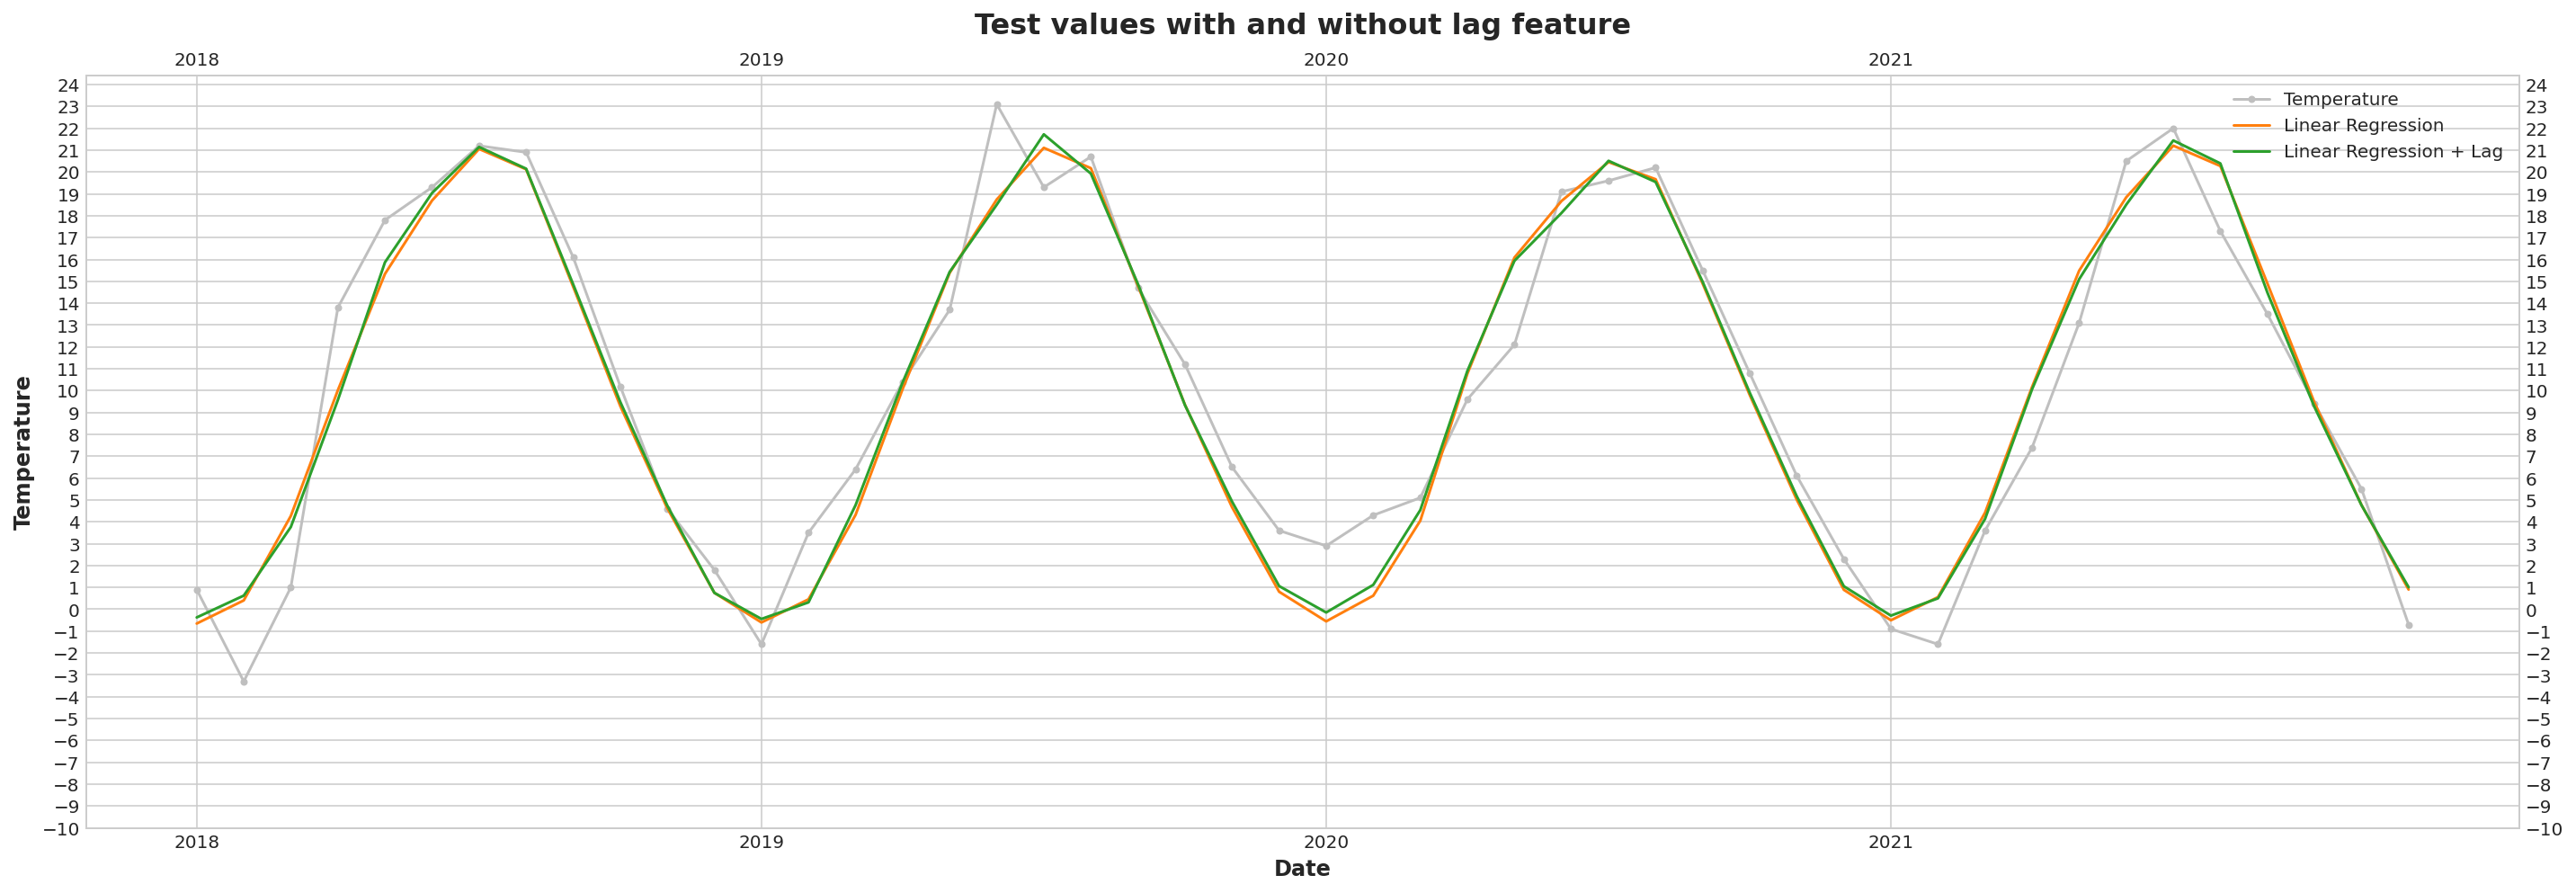

In [37]:
fig, ax = plt.subplots()
ax.plot(y_4[-len(y_pred_4):].values, color='0.75', marker='.')
ax.plot(y_pred_4.values,color='C1')
ax.plot(y_pred_4_1.values, color='C2')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Test values with and without lag feature',
       xticks= np.arange(0, len(y_pred_4), step=12),
       xticklabels= (y_pred_4).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Linear Regression','Linear Regression + Lag']);

# **5) Hybrid models**

In [38]:
y_5 = df['Monthly average temperature (°C)']

dp_5 = DeterministicProcess(
    index=y_5.index,  
    constant=True,  
    order=1,        
    drop=True,      
)

X_5 = dp_5.in_sample()  

In [39]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=48, shuffle=False)

model_5 = LinearRegression(fit_intercept=False)
model_5.fit(X_train_5, y_train_5)
y_fit_5 = pd.Series(model_5.predict(X_train_5), index=y_train_5.index)
y_pred_5 = pd.Series(model_5.predict(X_test_5), index=y_test_5.index)

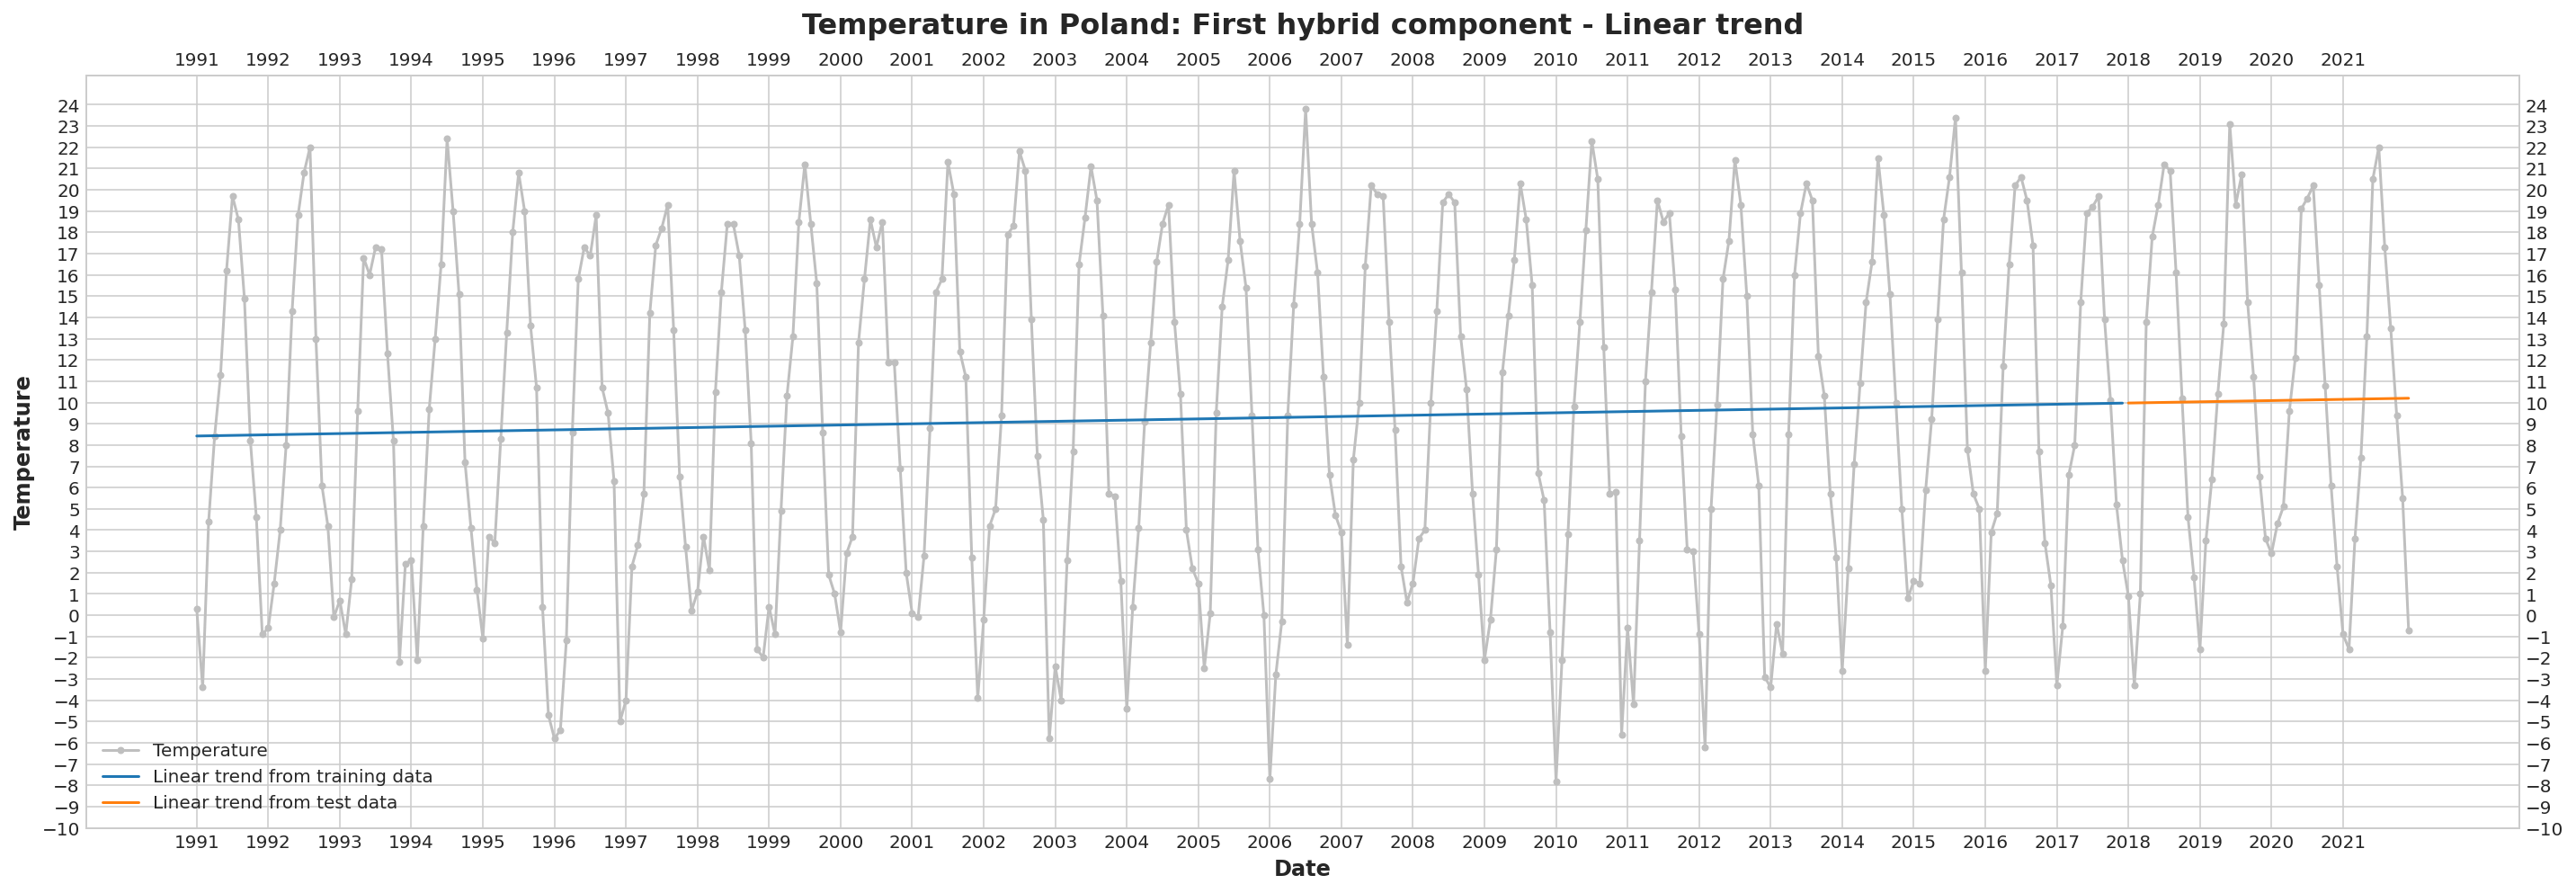

In [40]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, marker='.', color='0.75')
ax.plot(y_fit_5.values, color='C0')
ax.plot(np.append(np.zeros(len(y_fit_5)) + np.nan,y_pred_5.values), color='C1')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: First hybrid component - Linear trend',
       xticks= np.arange(0, len(y_5), step=12),
       xticklabels= (y_5).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Linear trend from training data','Linear trend from test data']);

In [41]:
X_5_1 = X_5.copy()
X_5_1["Month"] = X_5_1.index.month  

In [42]:
X_train_5_1, X_test_5_1, y_train_5_1, y_test_5_1 = train_test_split(X_5_1, y_5, test_size=48, shuffle=False)
y_resid_5 = y_train_5_1 - y_fit_5

model_5_1 = xgb.XGBRegressor();
model_5_1.fit(X_train_5_1, y_resid_5);
y_fit_5_1 = pd.Series(model_5_1.predict(X_train_5_1), index=y_train_5_1.index)
y_pred_5_1 = pd.Series(model_5_1.predict(X_test_5_1), index=y_test_5_1.index)

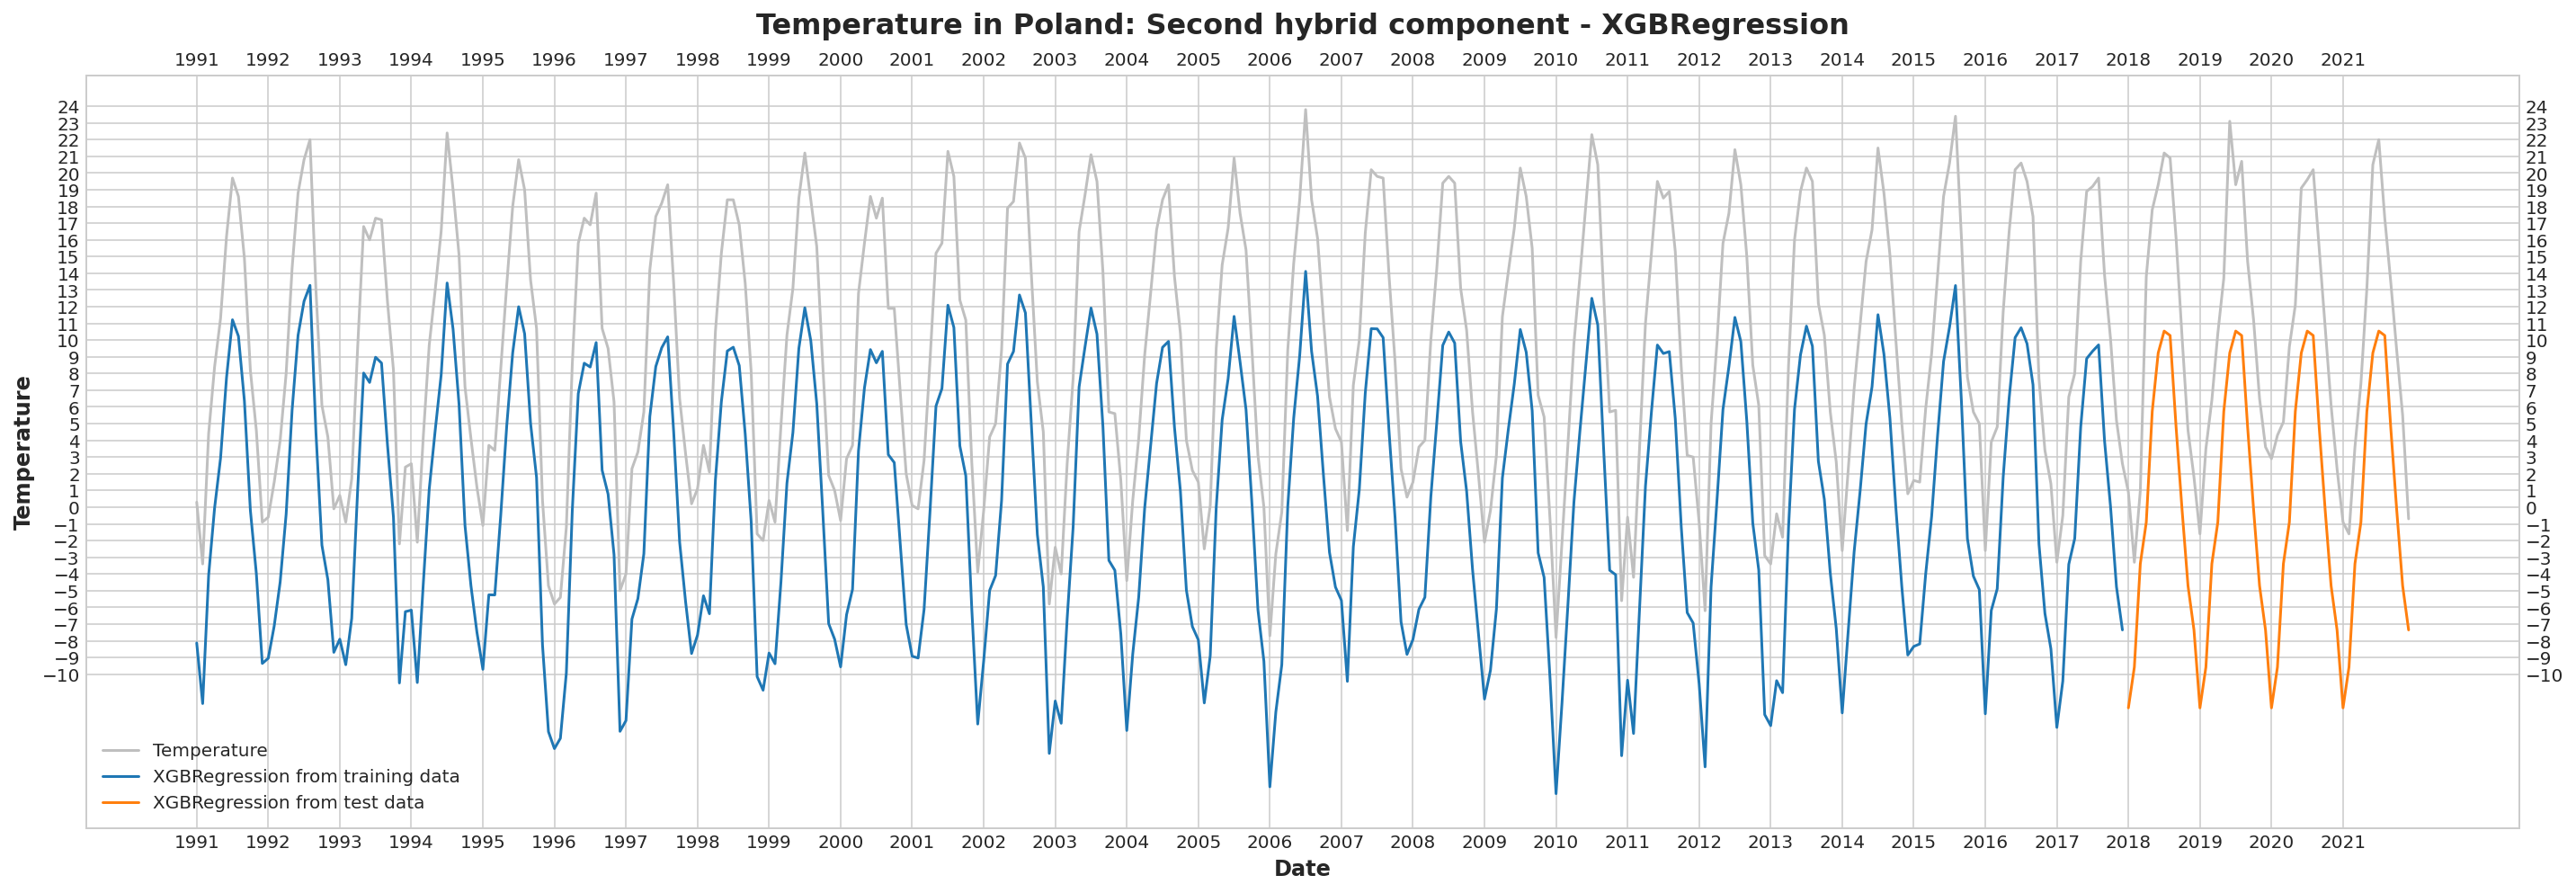

In [43]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(y_fit_5_1.values, color='C0')
ax.plot(np.append(np.zeros(len(y_fit_5_1)) + np.nan,y_pred_5_1.values), color='C1')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Second hybrid component - XGBRegression',
       xticks= np.arange(0, len(y_5), step=12),
       xticklabels= (y_5).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','XGBRegression from training data','XGBRegression from test data']);

In [44]:
y_fit_boosted_5 = y_fit_5_1 + y_fit_5
y_pred_boosted_5 = y_pred_5_1 + y_pred_5

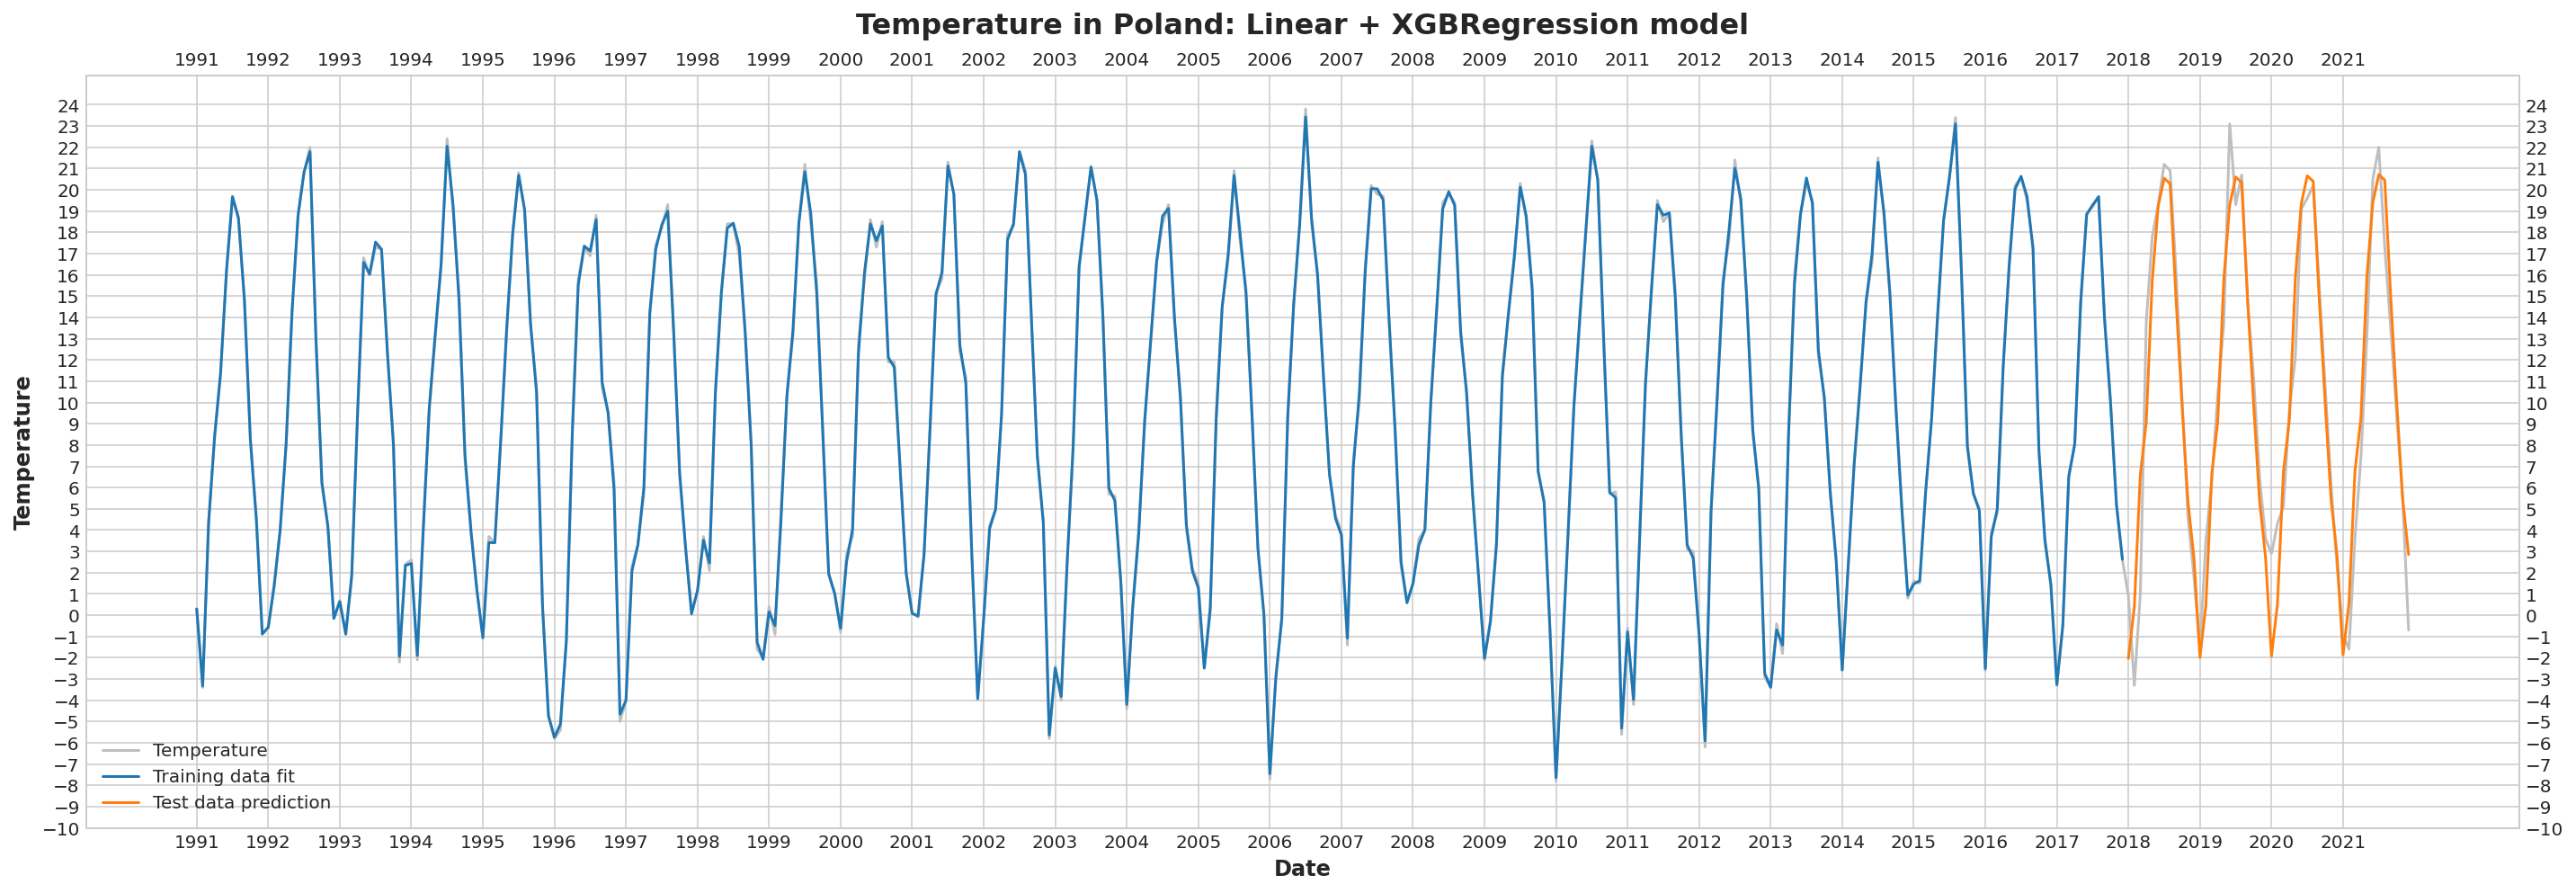

In [45]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(y_fit_boosted_5.values, color='C0')
ax.plot(np.append(np.zeros(len(y_fit_boosted_5)) + np.nan,y_pred_boosted_5.values), color='C1')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Linear + XGBRegression model',
       xticks= np.arange(0, len(y_5), step=12),
       xticklabels= (y_5).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Training data fit','Test data prediction']);

In [46]:
X_fore_5 = dp_5.out_of_sample(steps=steps)
model_5.fit(X_5, y_5)
y_fore_5 = pd.Series(model_5.predict(X_fore_5), index=X_fore_5.index)
X_fore_5["Month"] = X_fore_5.index.month
y_resid_5_1 = y_5 - pd.Series(model_5.predict(X_5), index=X_5.index)

In [47]:
model_5_1.fit(X_5_1, y_resid_5_1)
y_fore_5_1 = pd.Series(model_5_1.predict(X_fore_5), index=X_fore_5.index)
y_fore_boosted_5_1 = y_fore_5_1 + y_fore_5

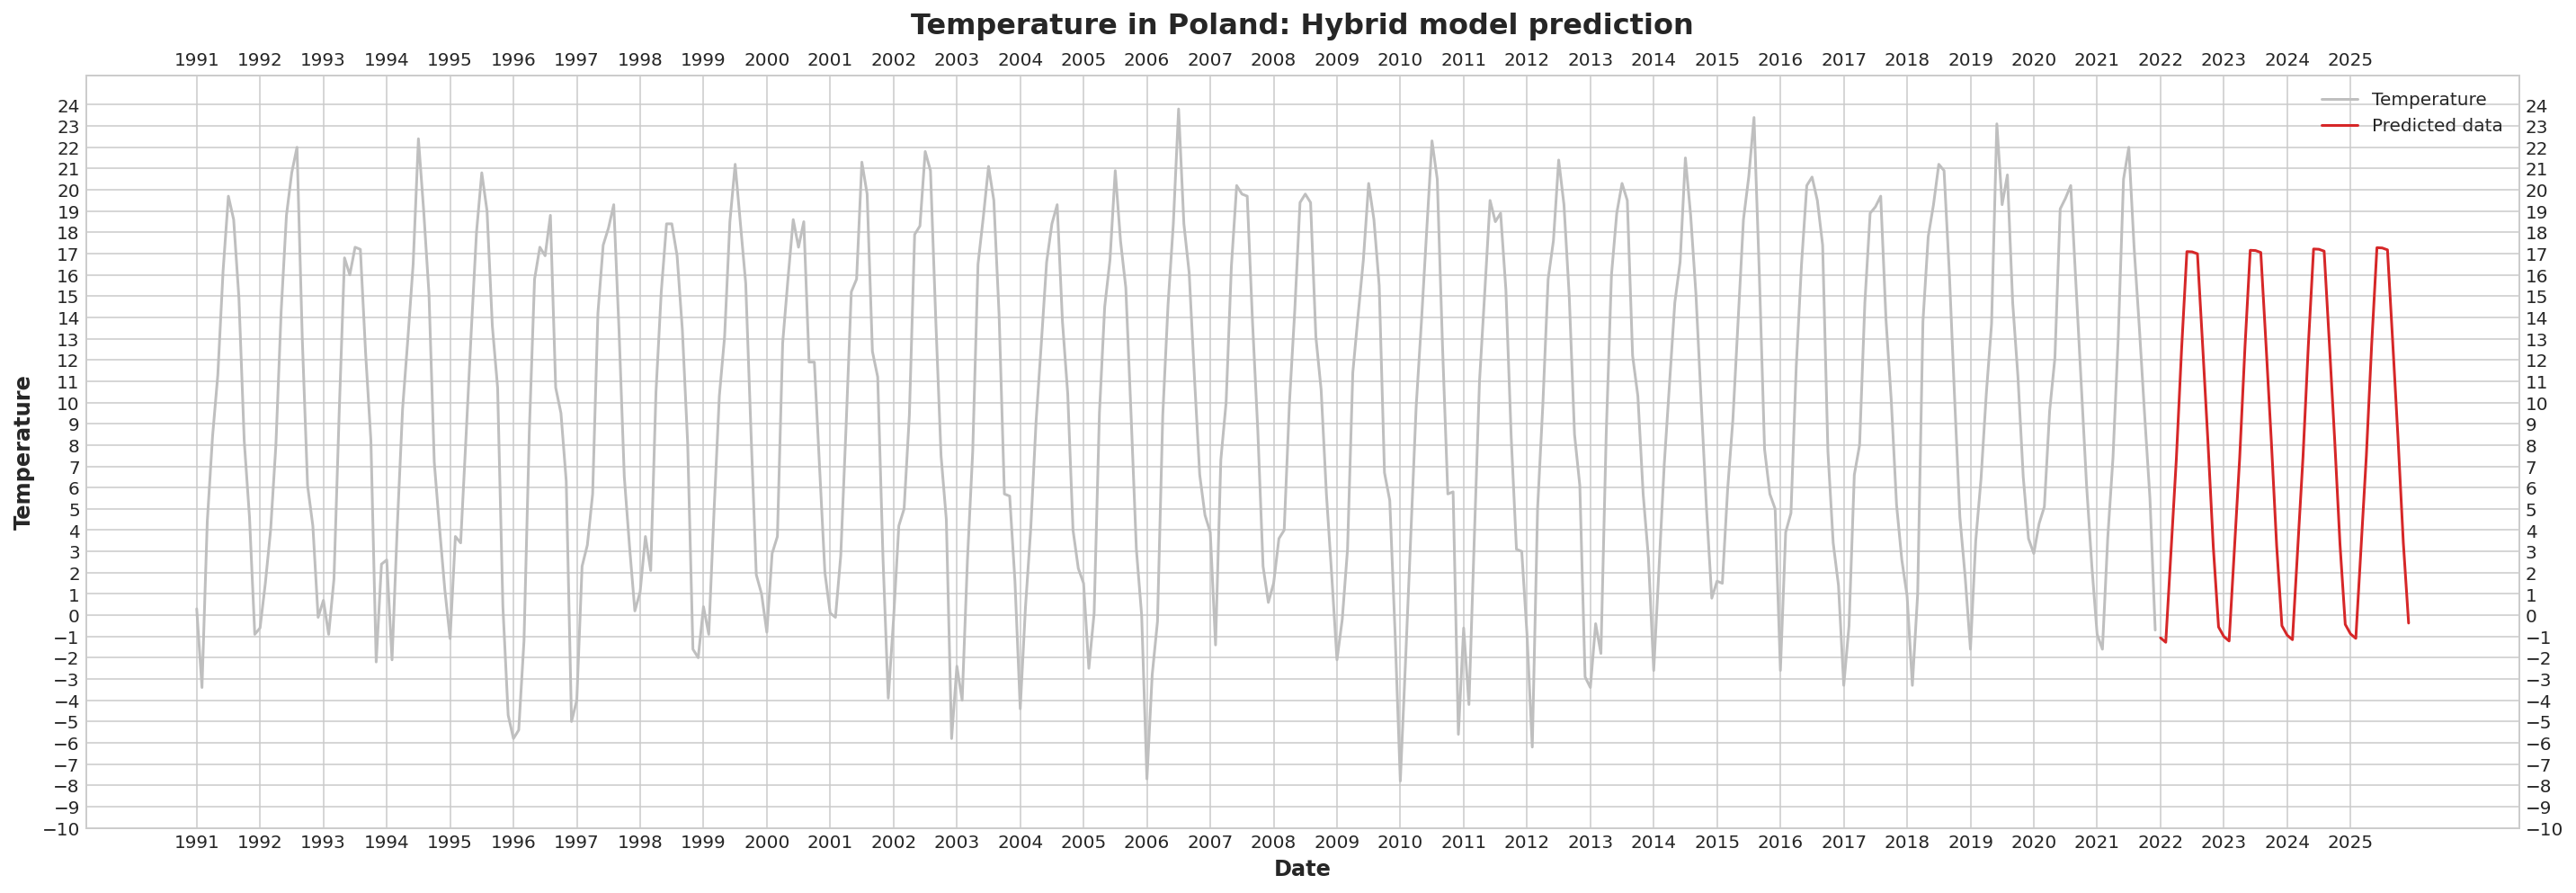

In [48]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(np.append(np.zeros(len(y_5)) + np.nan,y_fore_boosted_5_1.values), color='C3')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Hybrid model prediction',
       xticks= np.arange(0, len(y_5+y_fore_boosted_5_1), step=12),
       xticklabels= (y_5+y_fore_boosted_5_1).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Predicted data']);

# **6) Forecasting With Machine Learning**

# 6.1) Recusive strategy

In [49]:
X_6_1 = df
y_6_1 = df['Monthly average temperature (°C)']
X_train_6_1, X_test_6_1, y_train_6_1, y_test_6_1 = train_test_split(X_6_1, y_6_1, test_size=48, shuffle=False)

In [50]:
forecaster_6_1 = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                #regressor = LinearRegression(),
                lags = 12
                )

forecaster_6_1.fit(y_train_6_1)
forecaster_6_1

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Window size: 12 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 323] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-09-13 00:15:53 
Last fit date: 2022-09-13 00:15:54 
Skforecast version: 0.4.3 

In [51]:
predictions_6_1 = forecaster_6_1.predict(steps=steps)
predictions_6_1.index = y_test_6_1.index

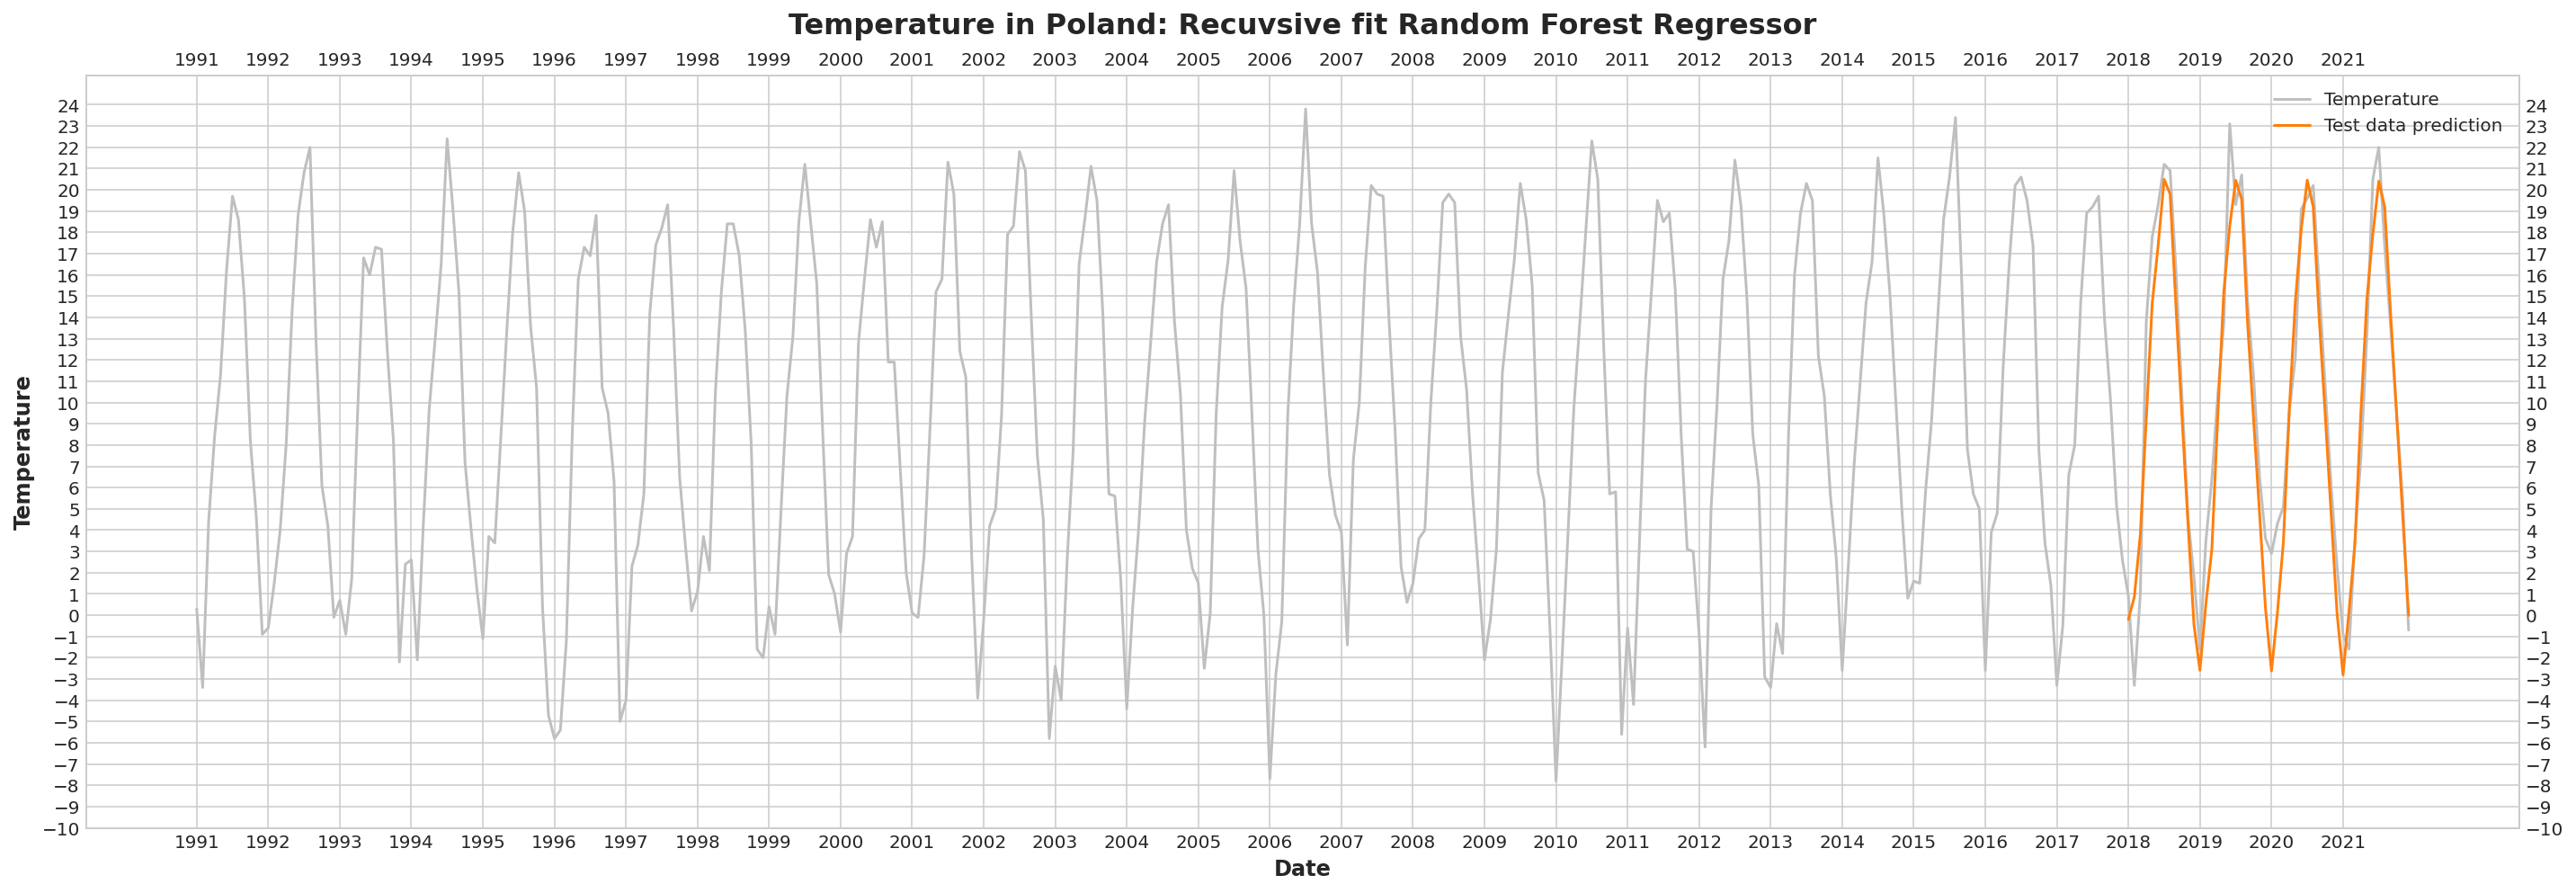

In [52]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(np.append(np.zeros(len(y_train_6_1)) + np.nan,predictions_6_1.values), color='C1')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Recuvsive fit Random Forest Regressor',
       xticks= np.arange(0, len(y_6_1), step=12),
       xticklabels= (y_6_1).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Test data prediction']);

In [53]:
lags_grid = [20, 30]

param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster_6_1,
                        y                  = y_6_1,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(y_6_1)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 8


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:59<00:00, 29.77s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 5.292580415501684



In [54]:
regressor = RandomForestRegressor(max_depth=5, n_estimators=500, random_state=123)
forecaster_6_1 = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster_6_1.fit(y_6_1)

In [55]:
forecast_6_1 = forecaster_6_1.predict(steps=steps)

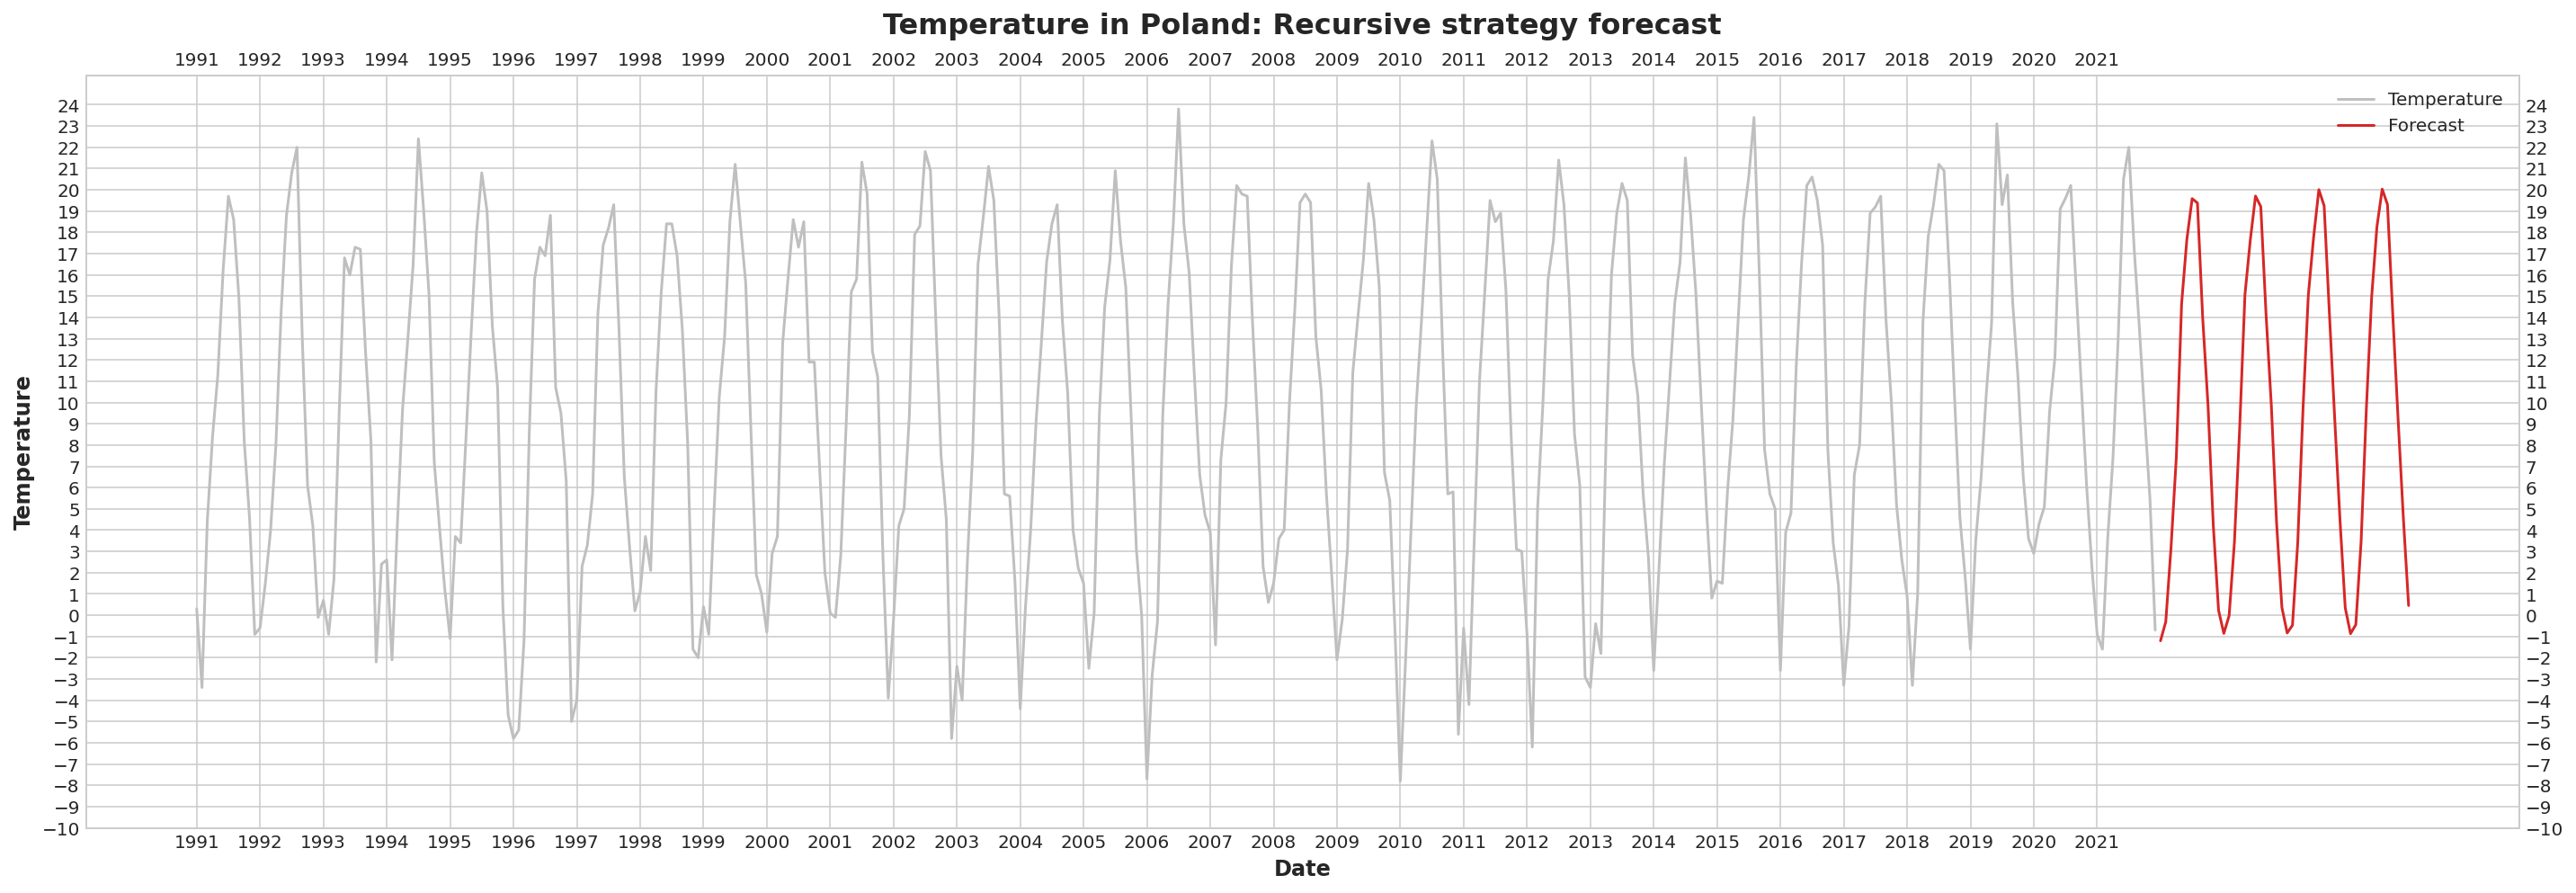

In [56]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(np.append(np.zeros(len(y_6_1)) + np.nan,forecast_6_1.values), color='C3')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Recursive strategy forecast',
       xticks= np.arange(0, len(y_6_1), step=12),
       xticklabels= (y_6_1).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Forecast']);

# 6.2) Direct strategy

In [57]:
X_6_2 = df
y_6_2 = df['Monthly average temperature (°C)']
X_train_6_2, X_test_6_2, y_train_6_2, y_test_6_2 = train_test_split(X_6_2, y_6_2, test_size=48, shuffle=False)

In [58]:
y_6_2.index = y_6_2.index.to_timestamp()
y_train_6_2.index = y_train_6_2.index.to_timestamp()
y_test_6_2.index = y_test_6_2.index.to_timestamp()

In [59]:
forecaster_6_2 = ForecasterAutoregMultiOutput(
                    regressor = make_pipeline(StandardScaler(), Lasso(random_state=123)),
                    steps     = steps,
                    lags      = 12
             )

forecaster_6_2.fit(y_train_6_2)

In [60]:
predictions_6_2 = forecaster_6_2.predict(steps=steps)

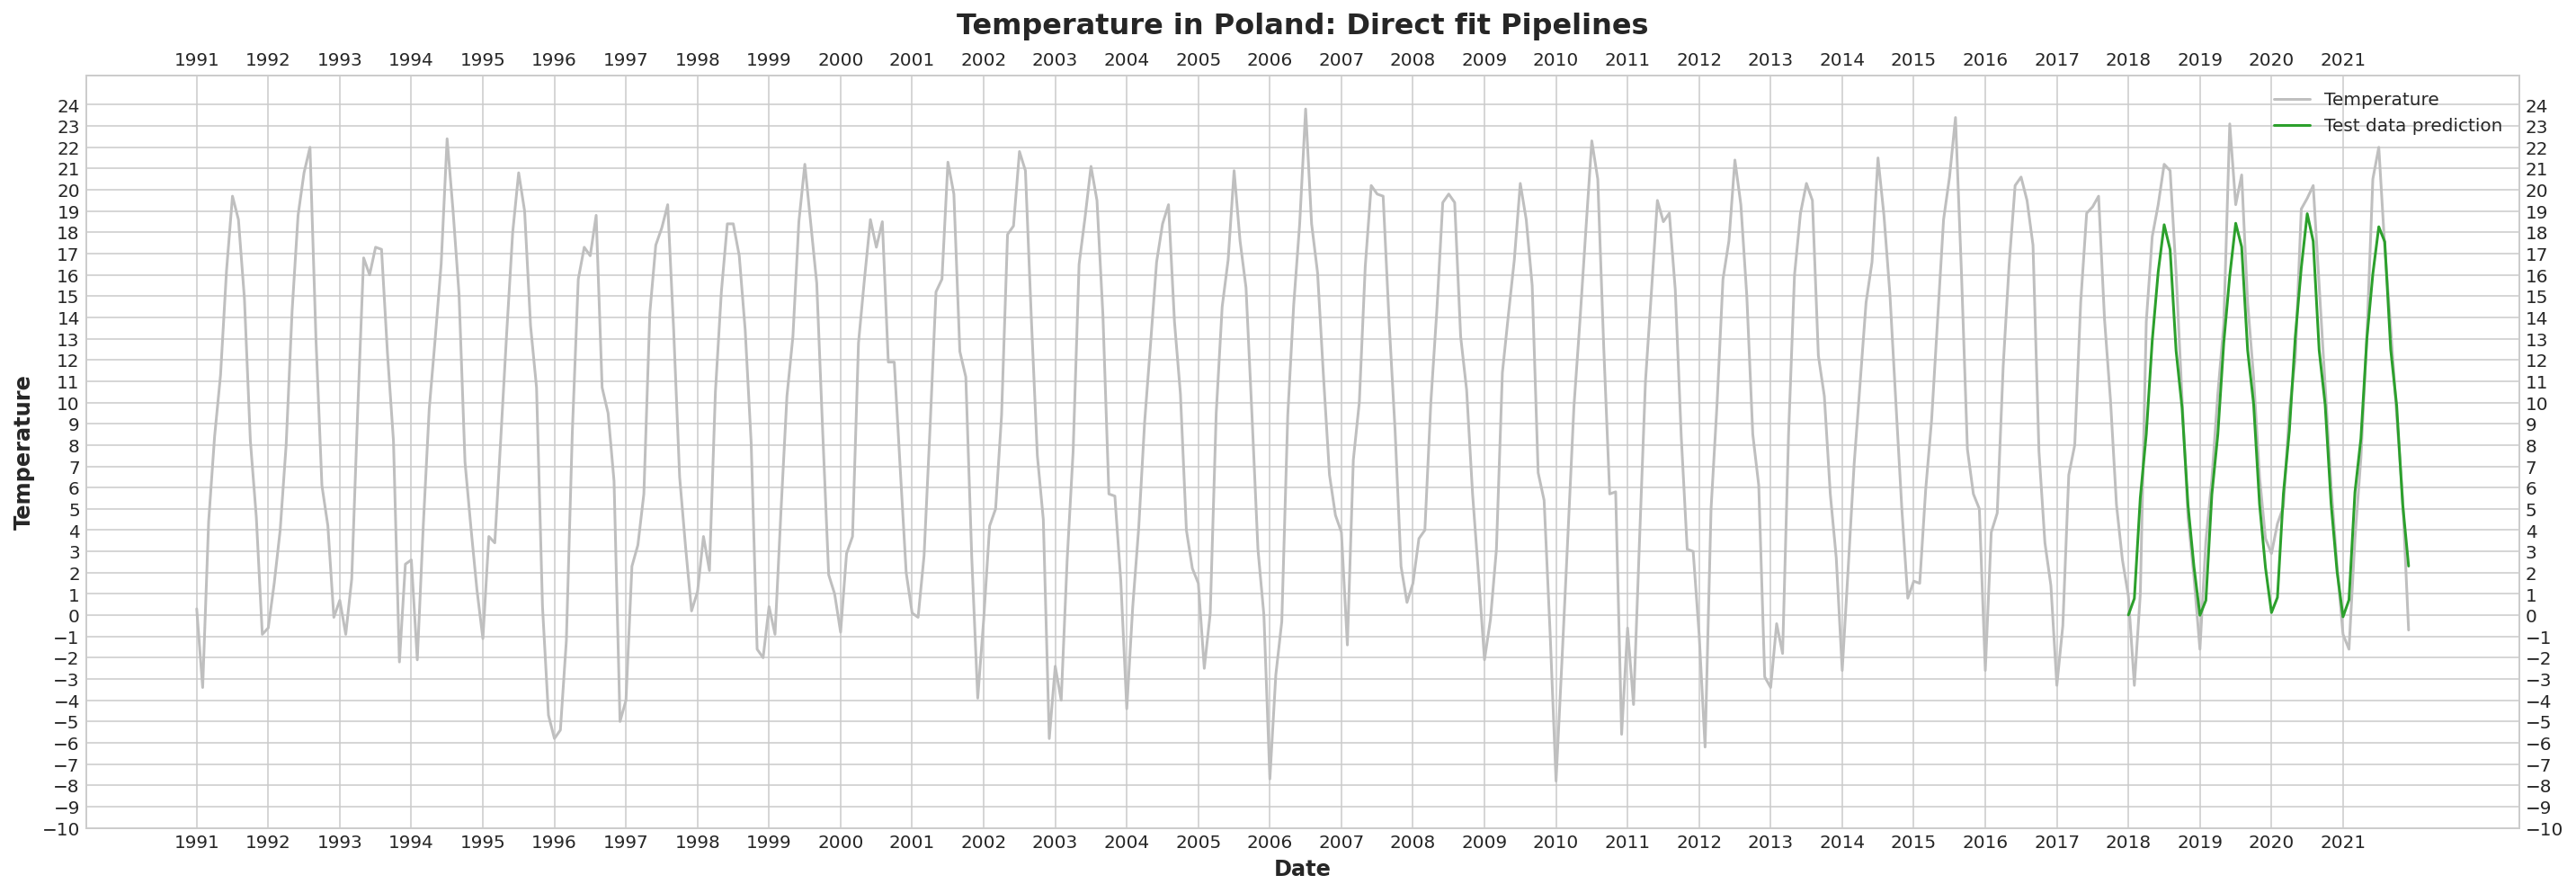

In [61]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(np.append(np.zeros(len(y_train_6_2)) + np.nan,predictions_6_2.values), color='C2')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Direct fit Pipelines',
       xticks= np.arange(0, len(y_6_2), step=12),
       xticklabels= (y_6_2).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Test data prediction']);

In [62]:
param_grid = {'lasso__alpha': np.logspace(-5, 5, 10)}
lags_grid = [10, 20]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster_6_2,
                        y           = y_6_2,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = steps,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(y_train_6_2)*0.5),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                )

Number of models compared: 20


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:25<00:00, 12.99s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'lasso__alpha': 0.021544346900318846}
  Backtesting metric: 5.766070904227044



In [63]:
forecaster_6_2 = ForecasterAutoregMultiOutput(
                    regressor = make_pipeline(StandardScaler(), Lasso(alpha=0.02, random_state=123)),
                    steps     = steps,
                    lags      = 20
             )

forecaster_6_2.fit(y_6_2)

In [64]:
forecast_6_2 = forecaster_6_2.predict(steps=steps)

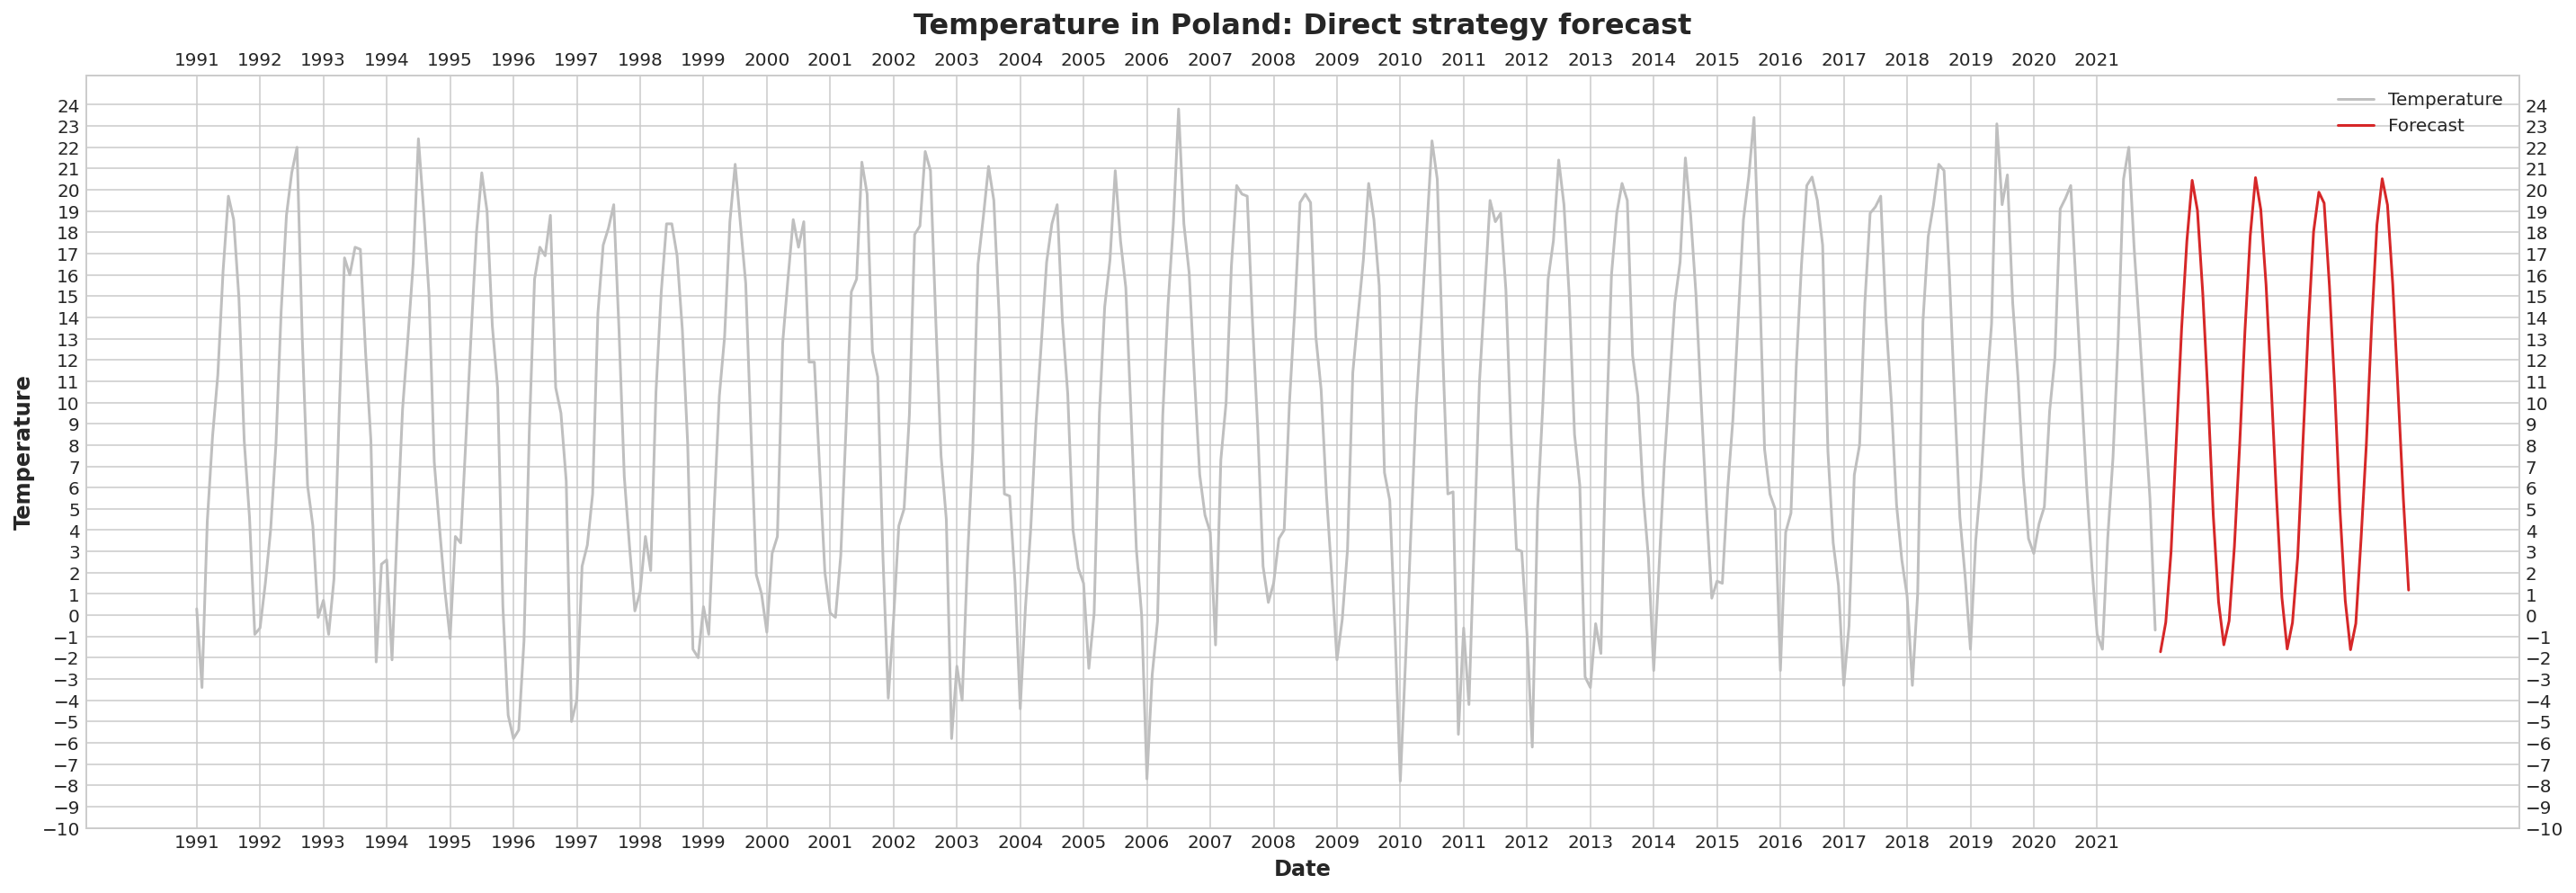

In [65]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(np.append(np.zeros(len(y_6_2)) + np.nan,forecast_6_2.values), color='C3')

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Direct strategy forecast',
       xticks= np.arange(0, len(y_6_2), step=12),
       xticklabels= (y_6_2).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature','Forecast']);

# 7) Summary

In [66]:
d = {'Linear trend':y_fore_2,
     'Seasonal trend':y_fore_3,
     'Hybrid model':y_fore_boosted_5_1,
     'Recursive model':forecast_6_1.values,
     'Direct model':forecast_6_2.values}

summary = pd.DataFrame(data=d, index=X_fore_3.index)

In [67]:
summary.mean()

Linear trend       10.403044
Seasonal trend     10.304723
Hybrid model        8.016621
Recursive model     9.274683
Direct model        9.356521
dtype: float64

In [68]:
summary.max()

Linear trend       10.522599
Seasonal trend     21.462672
Hybrid model       17.278804
Recursive model    20.032265
Direct model       20.571860
dtype: float64

In [69]:
summary.min()

Linear trend       10.283488
Seasonal trend     -0.251828
Hybrid model       -1.274106
Recursive model    -1.203567
Direct model       -1.721722
dtype: float64

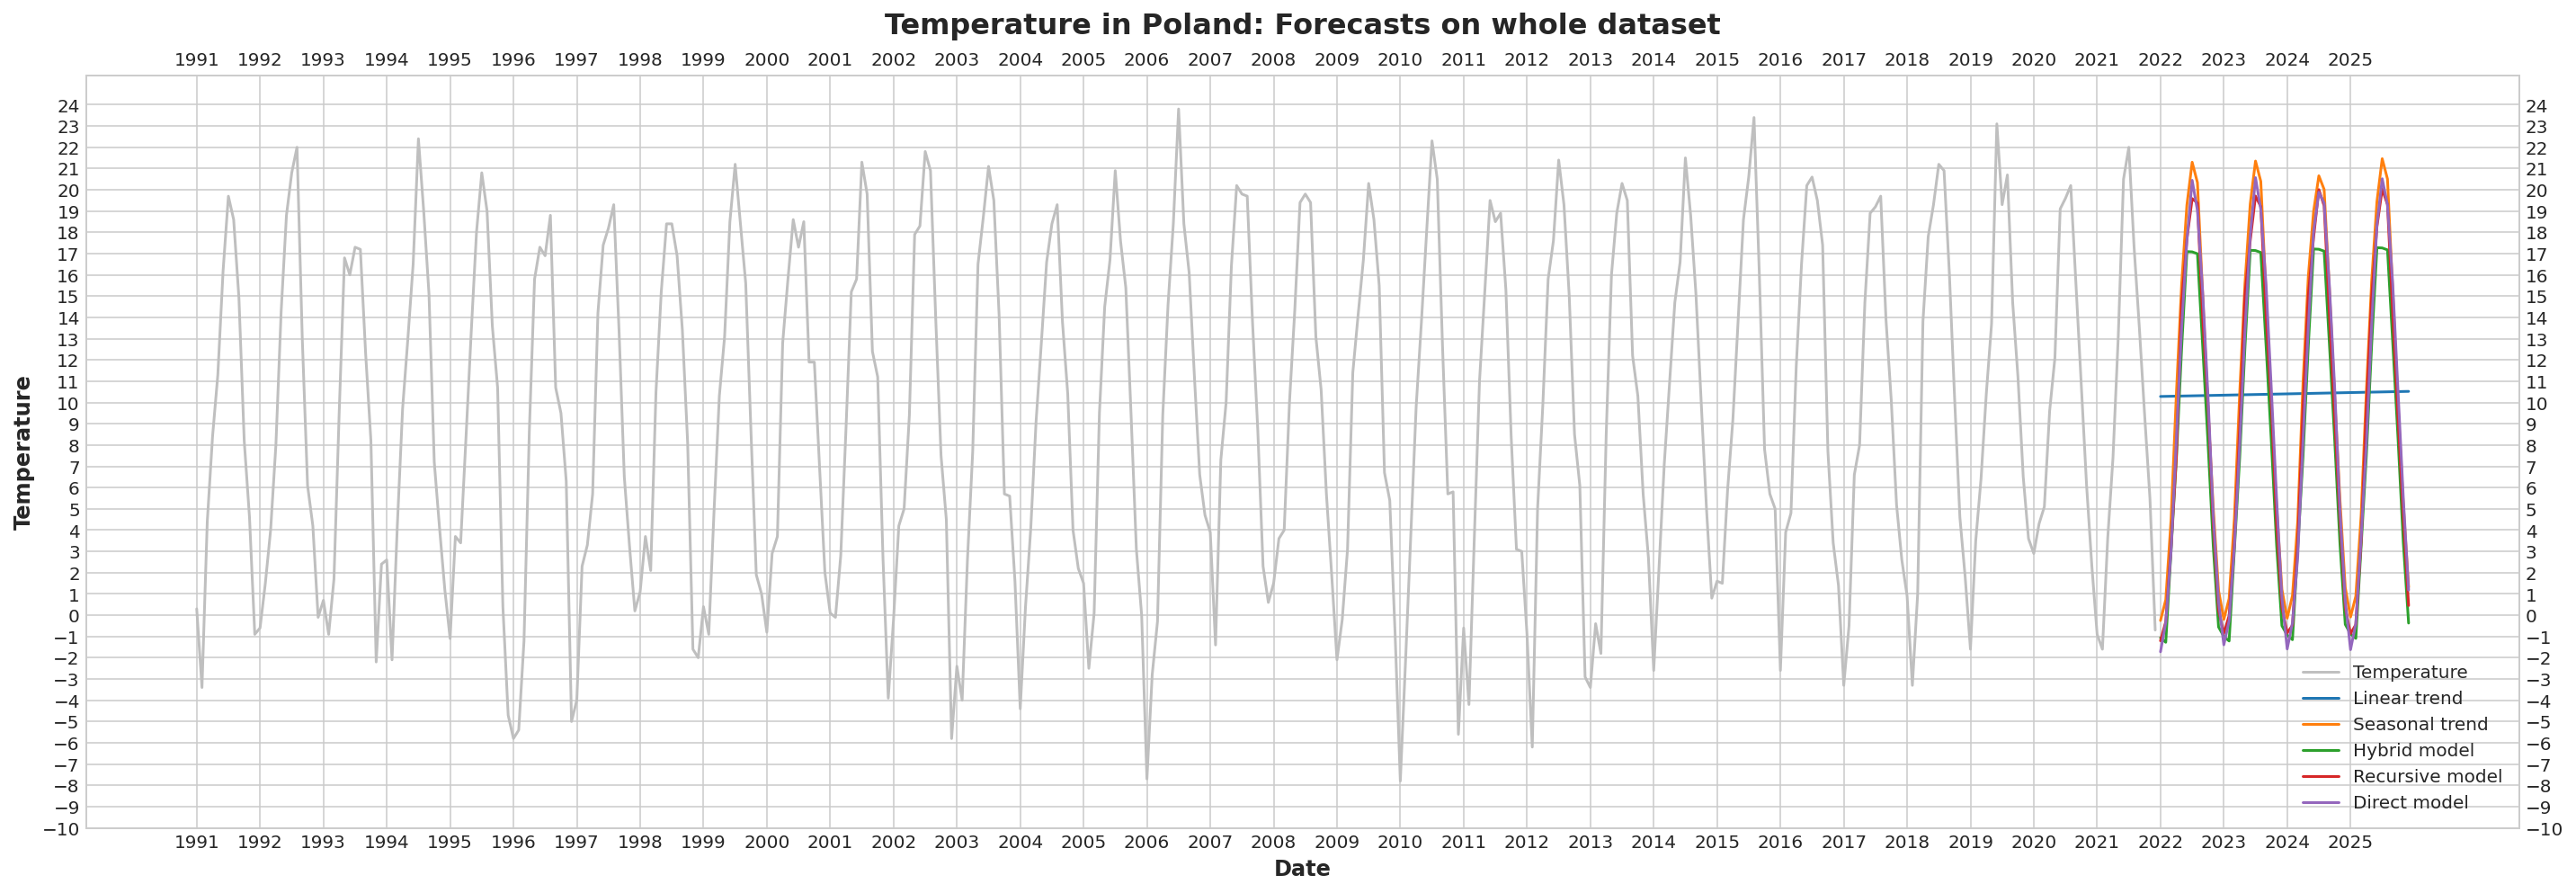

In [70]:
fig, ax = plt.subplots()
ax.plot(df['Monthly average temperature (°C)'].values, color='0.75')
ax.plot(np.append(np.zeros(len(y_pred_2)) + np.nan,y_fore_2.values));
ax.plot(np.append(np.zeros(len(y_pred_3)) + np.nan,y_fore_3.values));
ax.plot(np.append(np.zeros(len(y_5)) + np.nan,y_fore_boosted_5_1.values))
ax.plot(np.append(np.zeros(len(y_6_1)) + np.nan,forecast_6_1.values))
ax.plot(np.append(np.zeros(len(y_6_2)) + np.nan,forecast_6_2.values))

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Forecasts on whole dataset',
       xticks= np.arange(0, len(X_2+X_fore_3), step=12),
       xticklabels= (X_2+X_fore_3).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Temperature', 'Linear trend', 'Seasonal trend', 'Hybrid model', 'Recursive model', 'Direct model' ]);

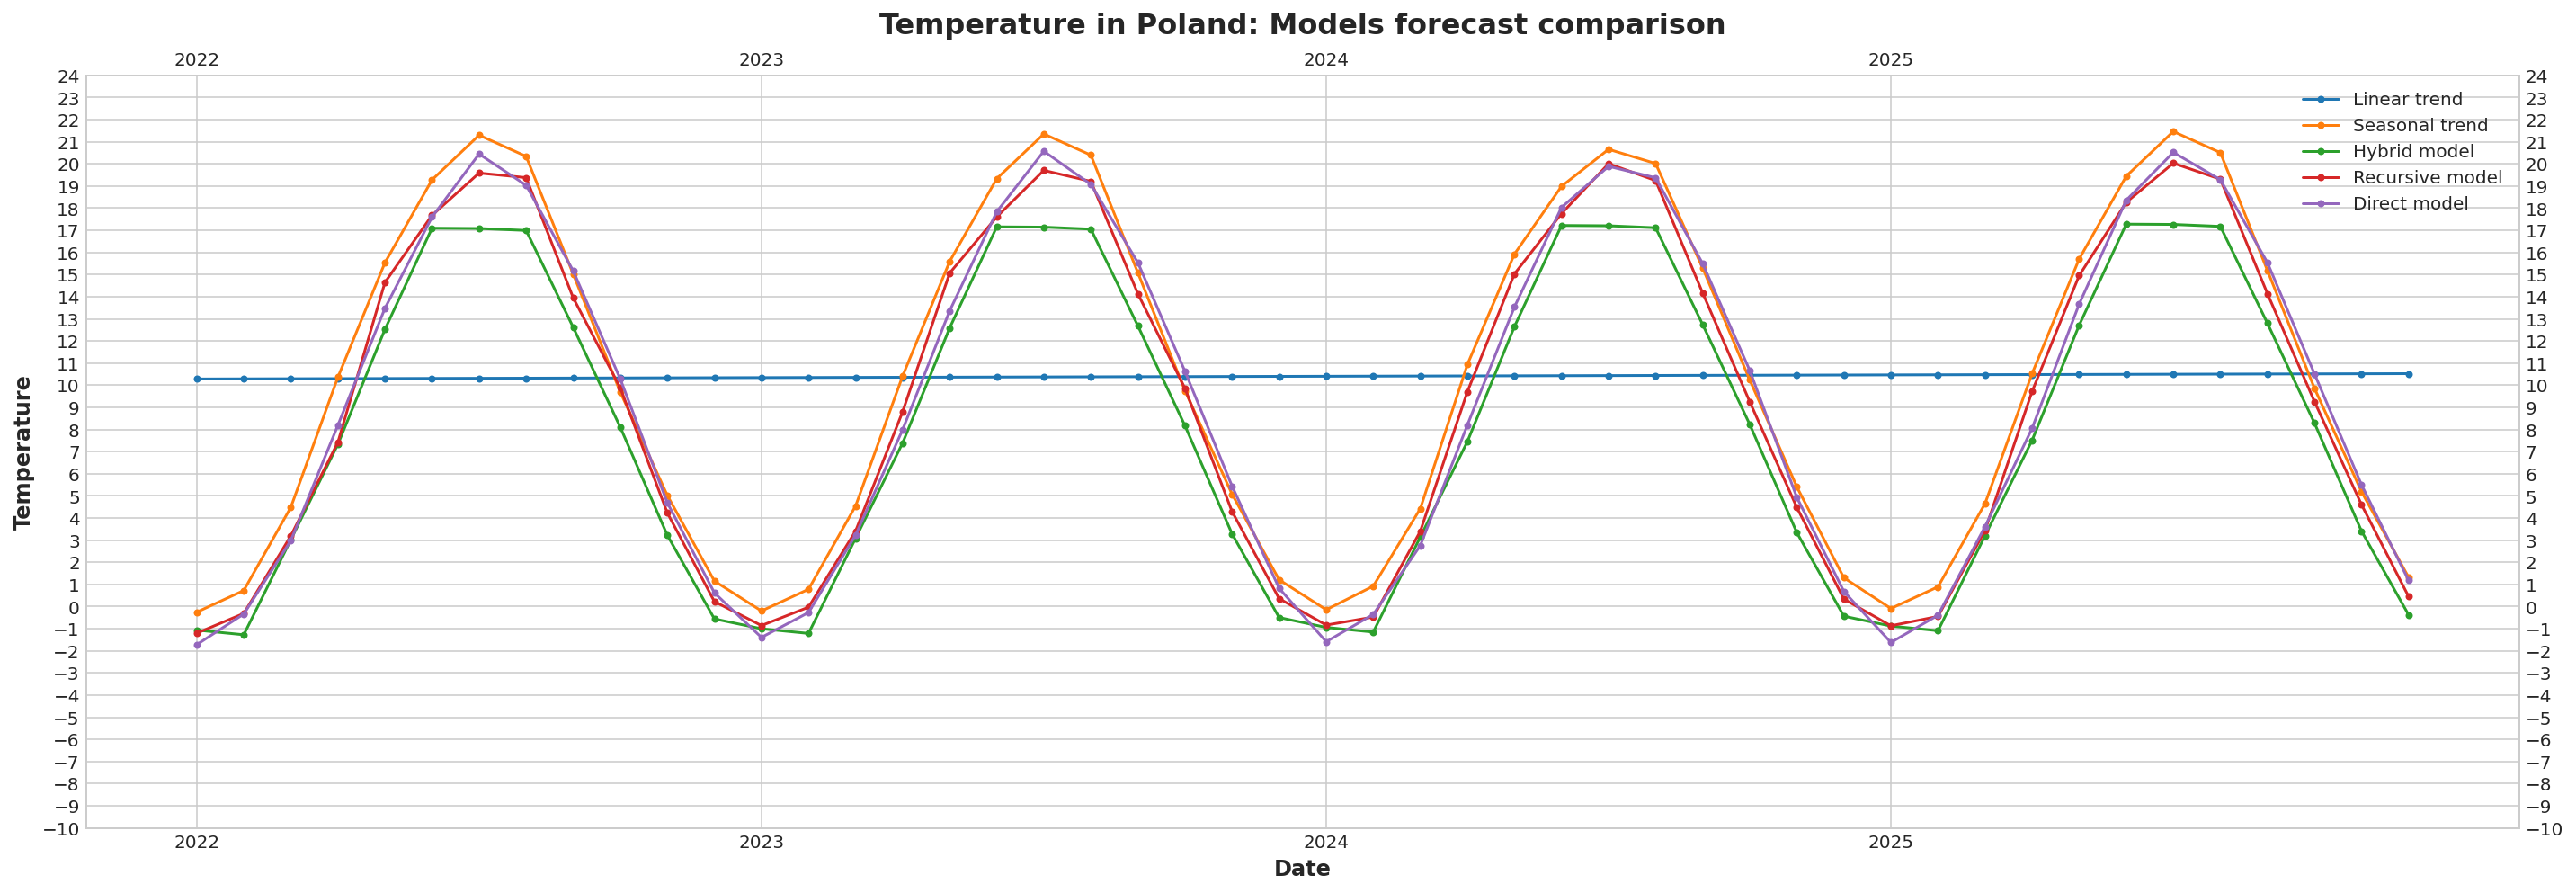

In [71]:
fig, ax = plt.subplots()
ax.plot(y_fore_2.values, marker='.');
ax.plot(y_fore_3.values, marker='.');
ax.plot(y_fore_boosted_5_1.values, marker='.');
ax.plot(forecast_6_1.values, marker='.');
ax.plot(forecast_6_2.values, marker='.');

ax.set(ylabel='Temperature',
       xlabel='Date', 
       title='Temperature in Poland: Models forecast comparison',
       xticks= np.arange(0, len(y_fore_2), step=12),
       xticklabels= (y_fore_2).index.strftime('%Y').unique().tolist(),
       yticks=np.arange(-10, 25, step=1),);
ax.legend(['Linear trend','Seasonal trend', 'Hybrid model', 'Recursive model', 'Direct model']);